Used Libraries

In [1]:
from scipy import optimize
from math import cos,sin,exp,pi
import numpy as np
import matplotlib.pyplot as plt

Functions

In [2]:
def g1(X):
    return 3*X[0]-cos(X[1]*X[2])-0.5
def g2(X):
    return X[0]**2 - 81*((X[1] + 0.1)**2)+ sin(X[2]) + 1.06
def g3(X):
    return exp(-1*X[0]*X[1]) + 20*X[2] + (10*pi - 3)/3 
def f(X):
    return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
def mag(x):
    return np.sqrt(x.dot(x))

1st Derivatives 

In [3]:
def g1x1(X):
    return 3
def g1x2(X):
    return X[2]*sin(X[1]*X[2])
def g1x3(X):
    return X[1]*sin(X[1]*X[2])
def g2x1(X):
    return 2*X[0]
def g2x2(X):
    return -1*162*(X[1]+0.1)
def g2x3(X):
    return cos(X[2])
def g3x1(X):
    return -1*X[1]*exp(-1 * X[0] * X[1])
def g3x2(X):
    return -1*X[0]*exp(-1 * X[0] * X[1])
def g3x3(X):
    return 20
def f_diff(X):
    return np.array([
        g1x1(X)*g1(X)+g2x1(X)*g2(X)+g3x1(X)*g3(X),
        g1x2(X)*g1(X)+g2x2(X)*g2(X)+g3x2(X)*g3(X),
        g1x3(X)*g1(X)+g2x3(X)*g2(X)+g3x3(X)*g3(X)
    ])


2nd Derivatives

In [4]:
def fx1x1(X):
    return   g1x1(X)**2\
            +g2x1(X)**2\
            +g2(X)*(2)\
            +g3(X)*(-1*X[1]*g3x1(X))\
            +g3x1(X)**2
def fx1x2(X):
    return   g1x1(X)*g1x2(X)\
            +g2x1(X)*g2x2(X)\
            +g3(X)*(X[0]*X[1]-1)*exp(-1*X[0]*X[1])\
            +g3x1(X)*g3x2(X)
def fx1x3(X):
    return   g1x1(X)*g1x3(X)\
            +g2x1(X)*g2x3(X)\
            +g3x1(X)*g3x3(X)
def fx2x2(X):
    return  (g1x2(X))**2\
            +g1(X)*(X[2]**2)*cos(X[1]*X[2])\
            +(g2x2(X))**2\
            +g2(X)*(-162)\
            +(g3x2(X))**2\
            +g3(X)*(-1*X[0]*g3x2(X))
def fx2x3(X):
    return  (g1x2(X))*g1x3(X)\
            +g1(X)*(X[1]*X[2]*sin(X[1]*X[2])+X[2]*cos(X[1]*X[2]))\
            +(g2x2(X))*g2x3(X)\
            +(g3x2(X))*g3x3(X)
def fx3x3(X):
    return  (g1x3(X))**2\
            +g1(X)*(X[1]**2)*cos(X[1]*X[2])\
            +(g2x3(X))**2\
            +g2(X)*(-1*sin(X[2]))\
            +g3x3(X)**2
def H(x):
    return np.array([[fx1x1(x),fx1x2(x),fx1x3(x)],
                    [fx1x2(x),fx2x2(x),fx2x3(x)],
                    [fx1x3(x),fx2x3(x),fx3x3(x)]
                    ])

Conventional gradient descent

In [5]:
def optimize(X0,u,e):
    X=np.array(X0)
    ddata=np.array([mag(f_diff(X))])
    fdata=np.array([f(X)])
    r=f_diff(X)
    while(mag(r)>e):
        r=f_diff(X)
        X=X-u*r
        ddata=np.append(ddata,[mag(r)], axis=0)
        fdata=np.append(fdata,[f(X)], axis=0)
    print('Soulution: ')
    print(X)
    plt.style.use('_mpl-gallery')
    plt.figure(figsize=(8, 2), dpi=80)
    x = np.arange(ddata.shape[0])
    plt.plot(x, ddata)
    plt.ylabel('1st Deravitive')
    plt.xlabel('Iteration')
    plt.show()
    plt.figure(figsize=(8, 2), dpi=80)
    plt.plot(x, fdata)
    plt.ylabel('Value')
    plt.xlabel('Iteration')
    plt.show()
    return(X)
    
    
        

Soulution: 
[ 5.00000111e-01  7.12192796e-09 -5.23598775e-01]


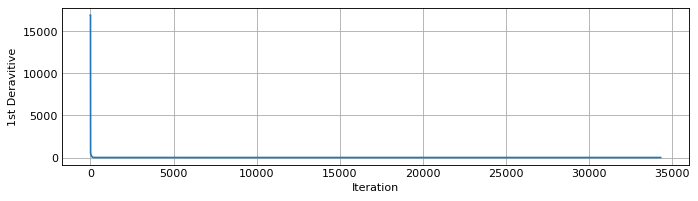

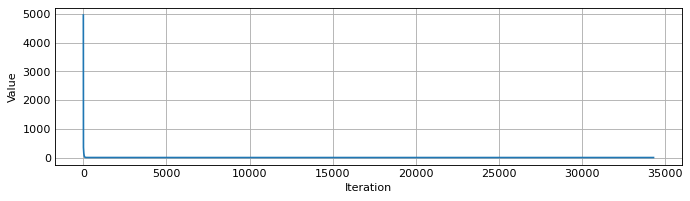

Soulution: 
[ 0.49703436 -0.19953647 -0.52881175]


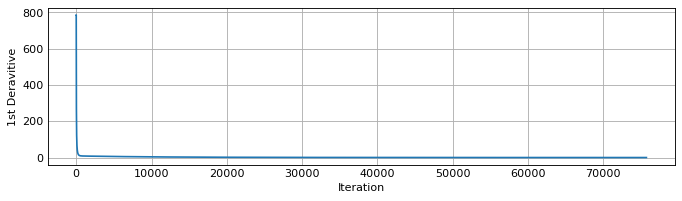

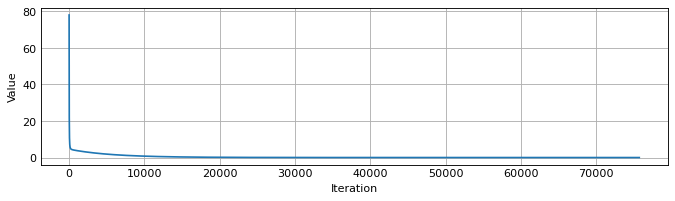

Soulution: 
[ 0.49703428 -0.19953646 -0.52881175]


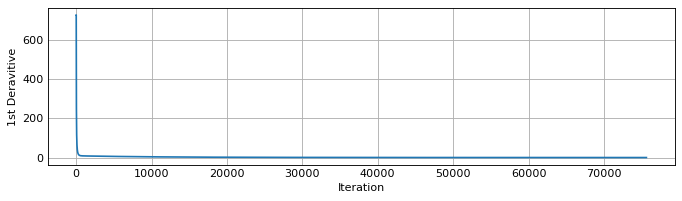

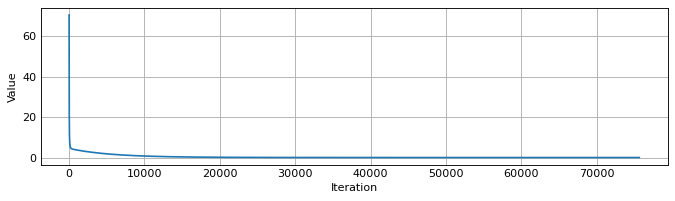

Soulution: 
[ 0.49703432 -0.19953647 -0.52881175]


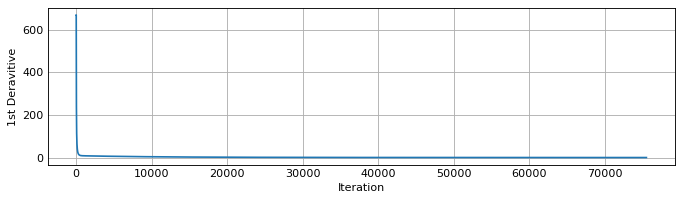

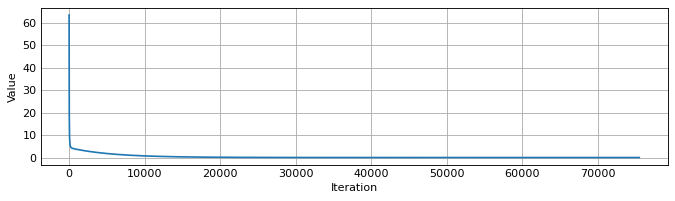

Soulution: 
[ 0.49703428 -0.19953646 -0.52881175]


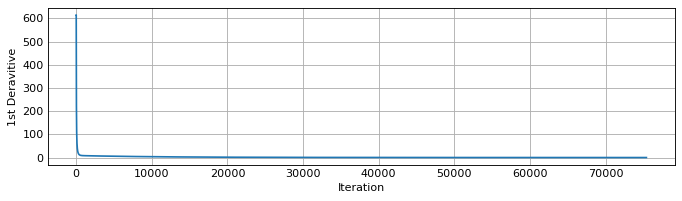

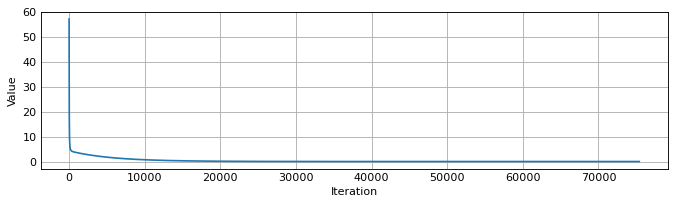

Soulution: 
[ 0.49703435 -0.19953647 -0.52881175]


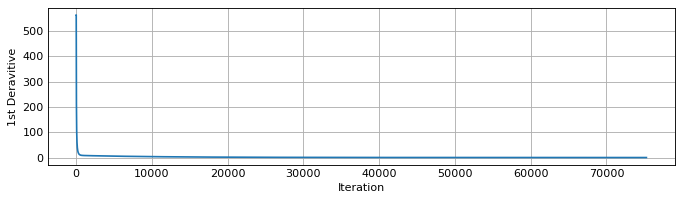

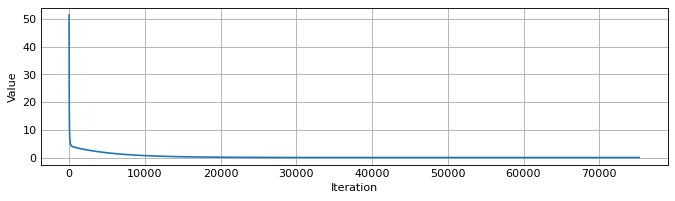

Soulution: 
[ 0.49703435 -0.19953647 -0.52881175]


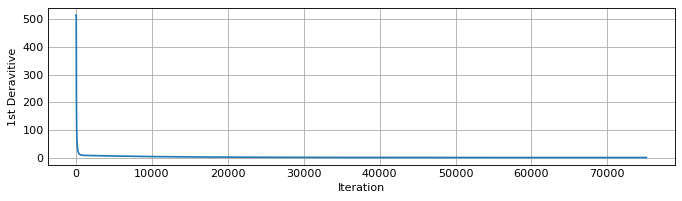

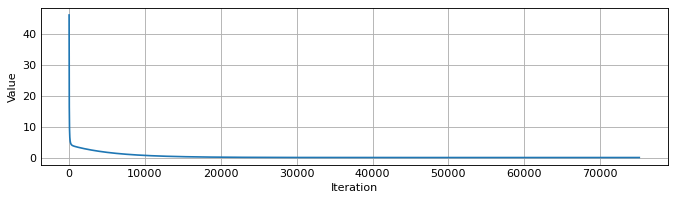

Soulution: 
[ 0.49703427 -0.19953646 -0.52881175]


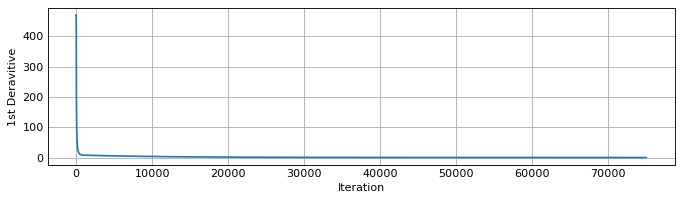

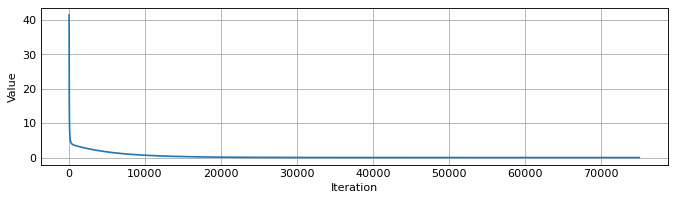

Soulution: 
[ 0.49703432 -0.19953647 -0.52881175]


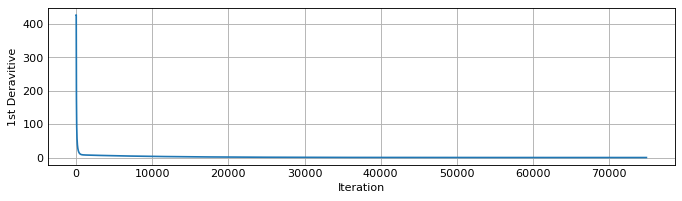

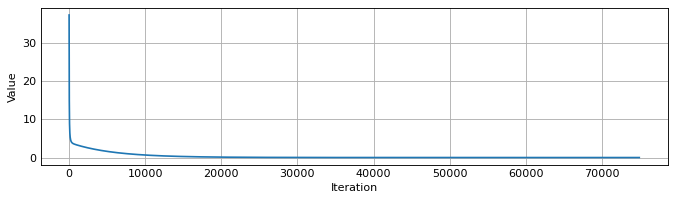

Soulution: 
[ 0.4970343  -0.19953647 -0.52881175]


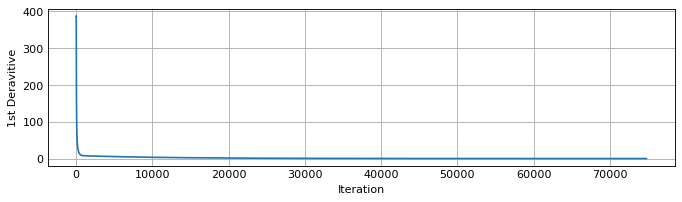

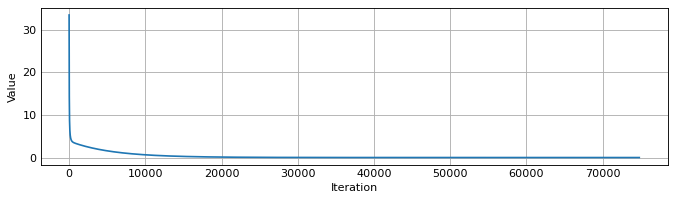

Soulution: 
[ 0.49703431 -0.19953647 -0.52881175]


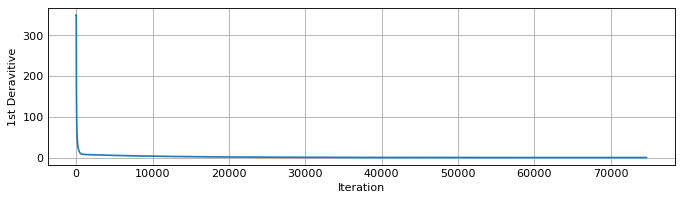

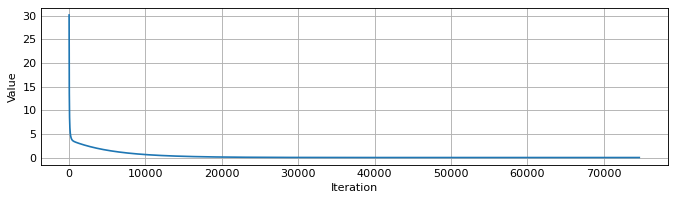

Soulution: 
[ 0.49703436 -0.19953647 -0.52881175]


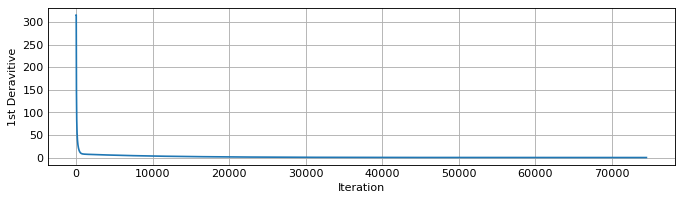

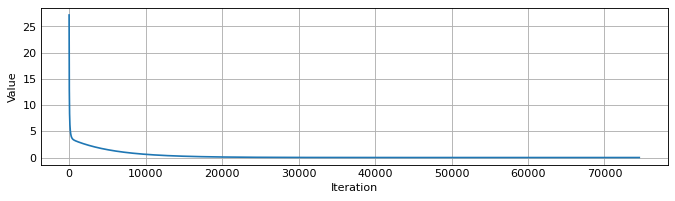

Soulution: 
[ 0.49703435 -0.19953647 -0.52881175]


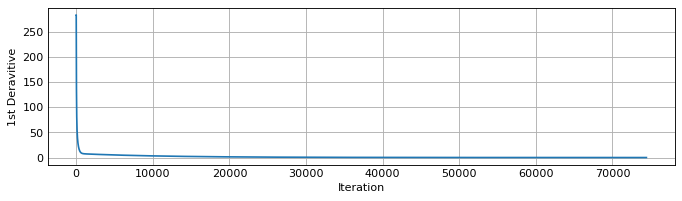

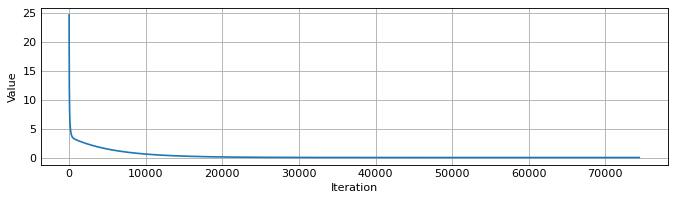

Soulution: 
[ 0.49703428 -0.19953646 -0.52881175]


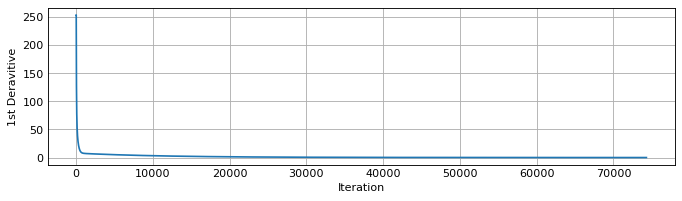

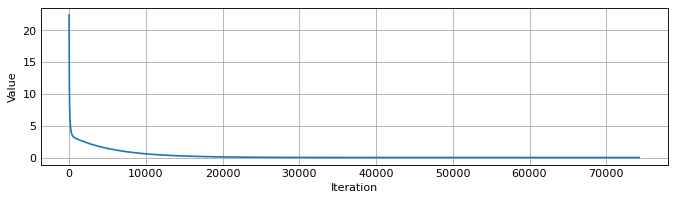

Soulution: 
[ 0.49703436 -0.19953647 -0.52881175]


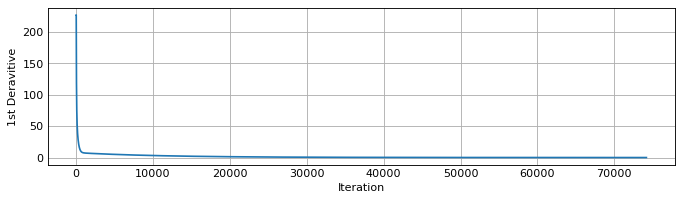

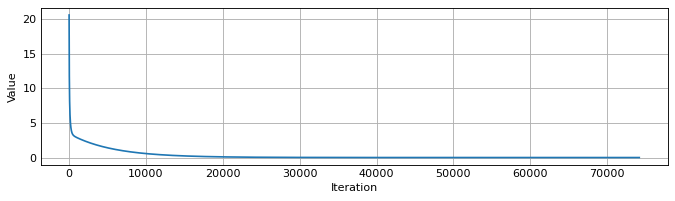

Soulution: 
[ 0.49703428 -0.19953646 -0.52881175]


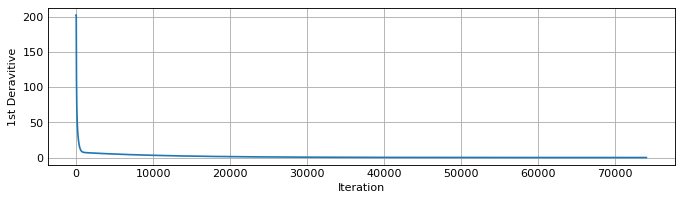

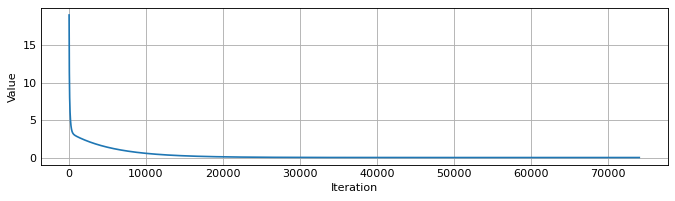

Soulution: 
[ 0.49703436 -0.19953647 -0.52881175]


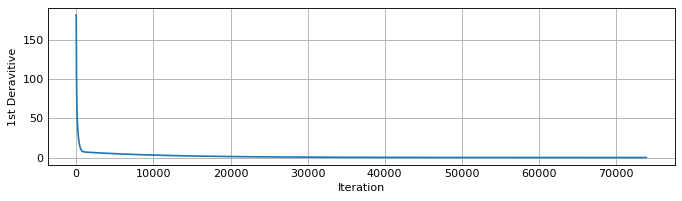

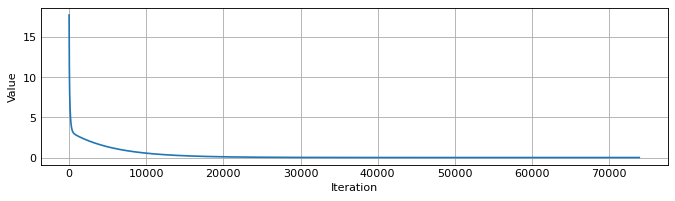

Soulution: 
[ 0.4970343  -0.19953647 -0.52881175]


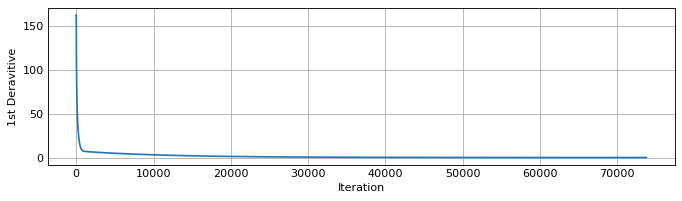

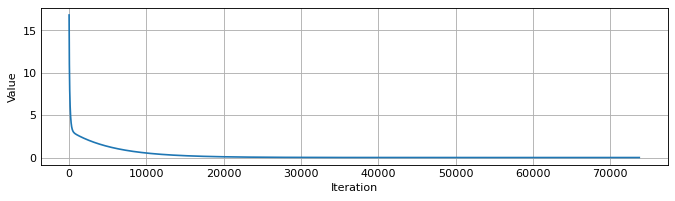

Soulution: 
[ 0.4970343  -0.19953647 -0.52881175]


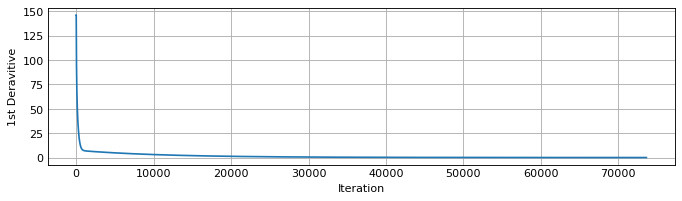

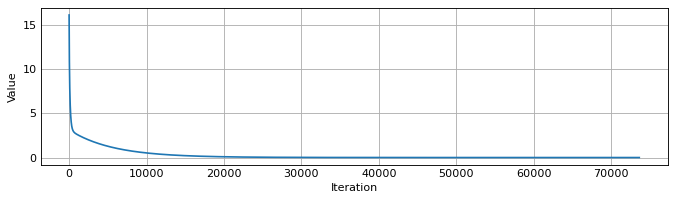

Soulution: 
[ 0.49703437 -0.19953647 -0.52881175]


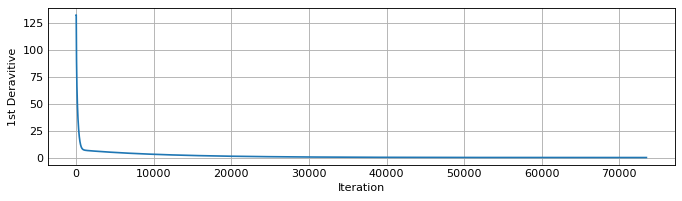

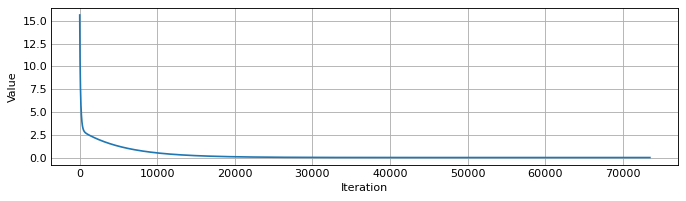

Soulution: 
[ 0.4970343  -0.19953647 -0.52881175]


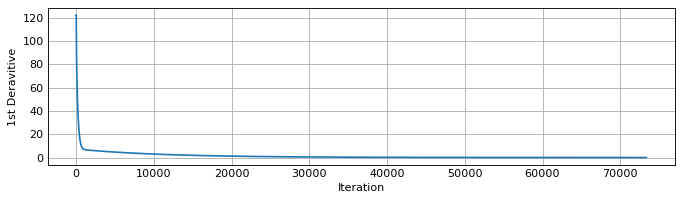

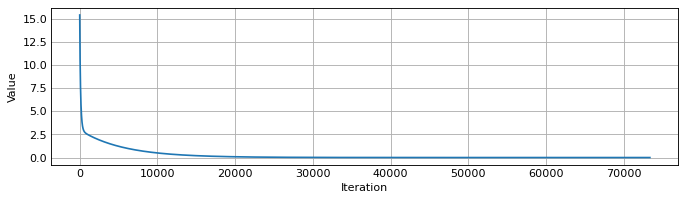

Soulution: 
[ 0.49703431 -0.19953647 -0.52881175]


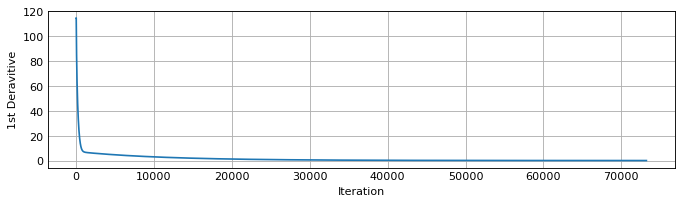

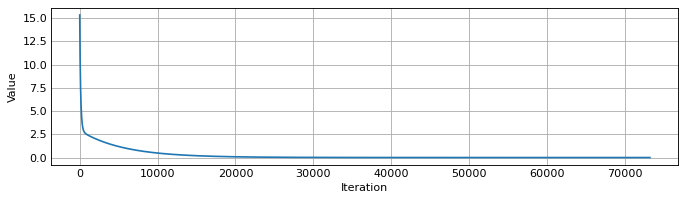

Soulution: 
[ 0.49703431 -0.19953647 -0.52881175]


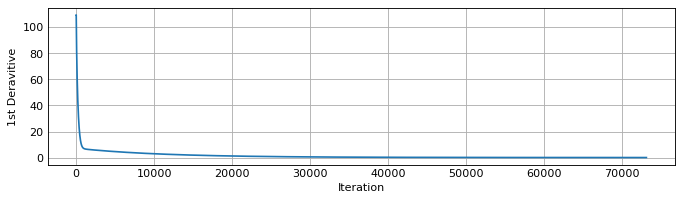

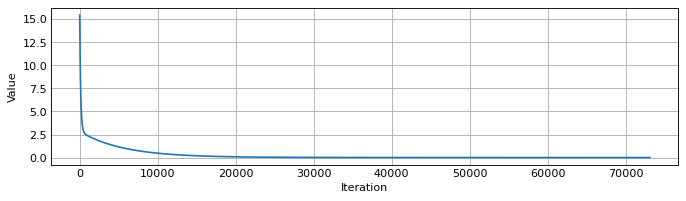

Soulution: 
[ 0.49703428 -0.19953646 -0.52881175]


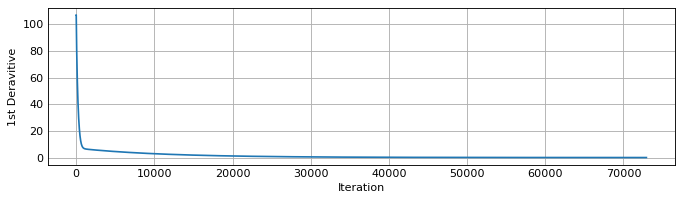

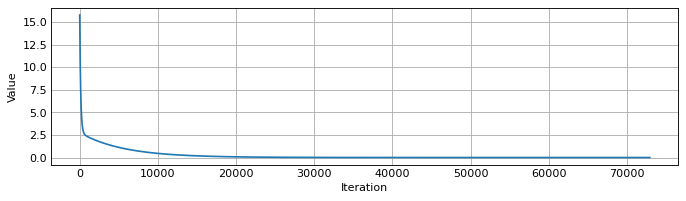

Soulution: 
[ 0.49703435 -0.19953647 -0.52881175]


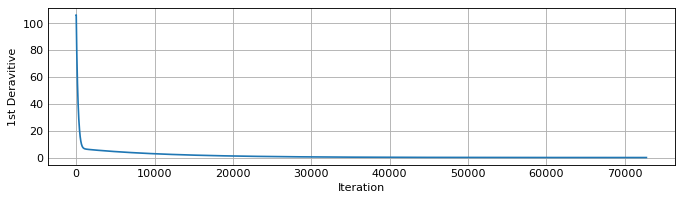

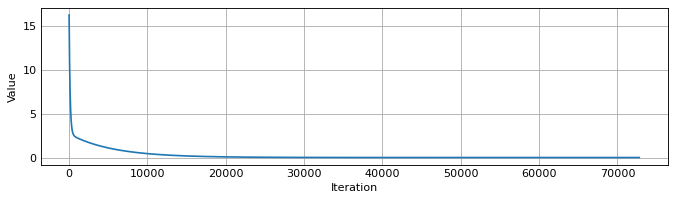

Soulution: 
[ 0.49703431 -0.19953647 -0.52881175]


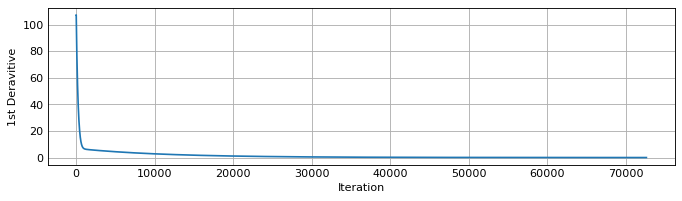

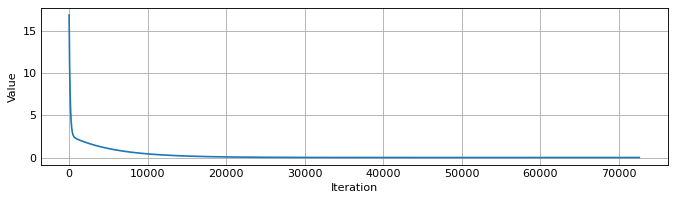

Soulution: 
[ 0.49703428 -0.19953646 -0.52881175]


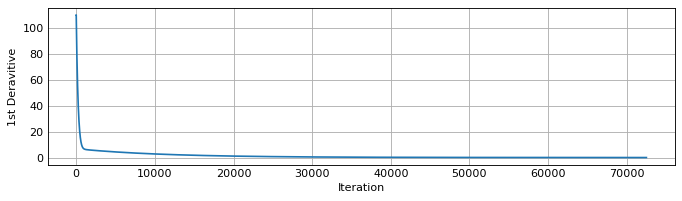

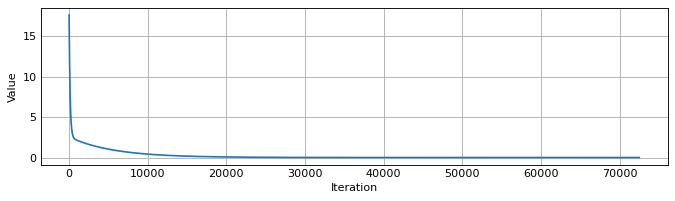

Soulution: 
[ 0.49703435 -0.19953647 -0.52881175]


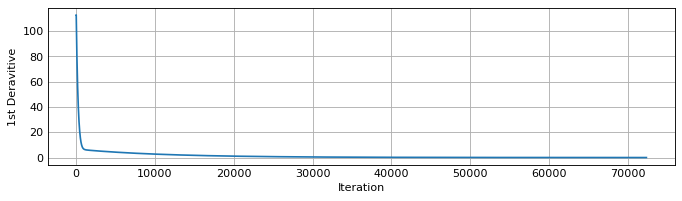

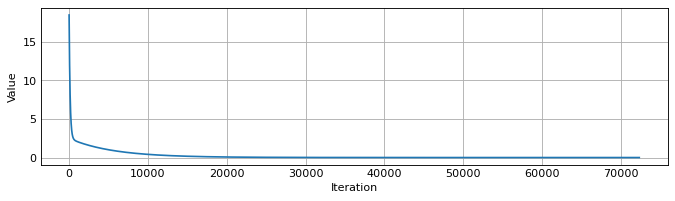

Soulution: 
[ 0.49703435 -0.19953647 -0.52881175]


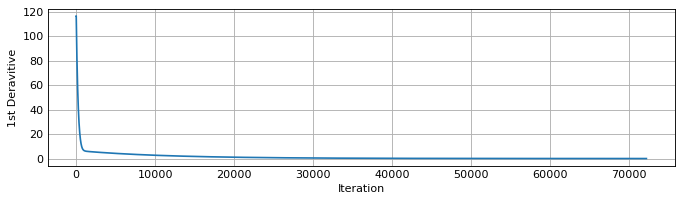

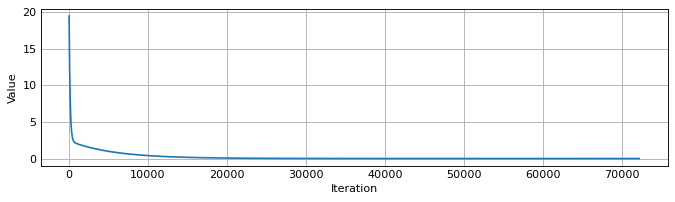

Soulution: 
[ 0.49703437 -0.19953647 -0.52881175]


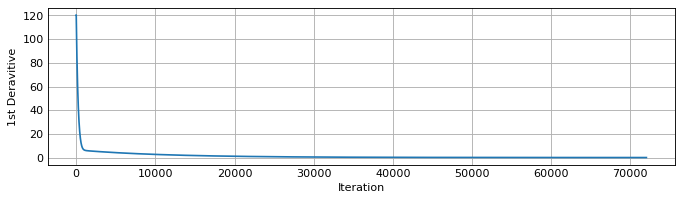

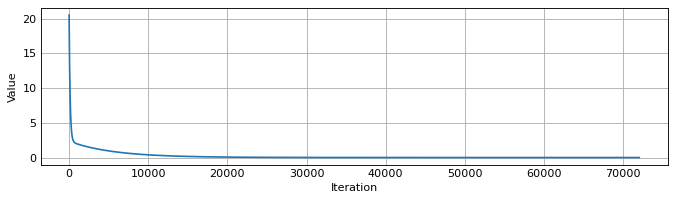

Soulution: 
[ 0.49703432 -0.19953647 -0.52881175]


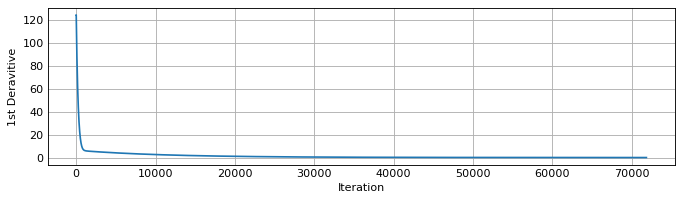

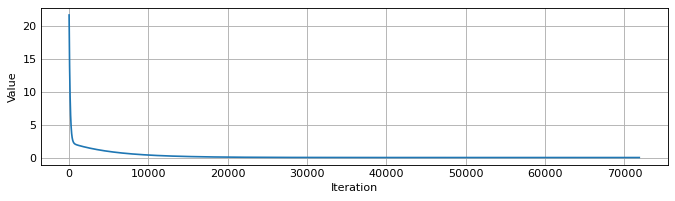

Soulution: 
[ 0.49703431 -0.19953647 -0.52881175]


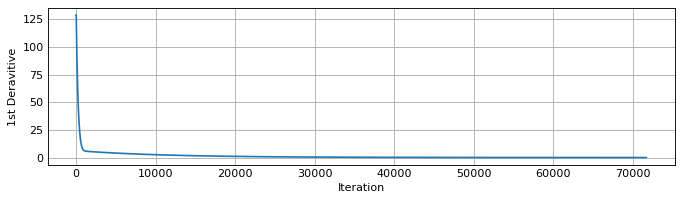

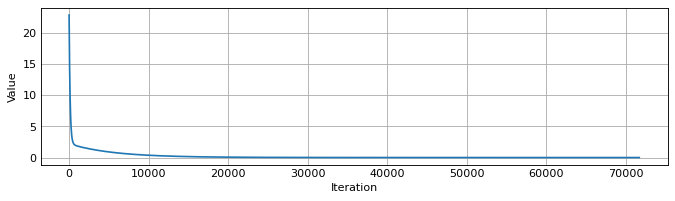

Soulution: 
[ 0.49703436 -0.19953647 -0.52881175]


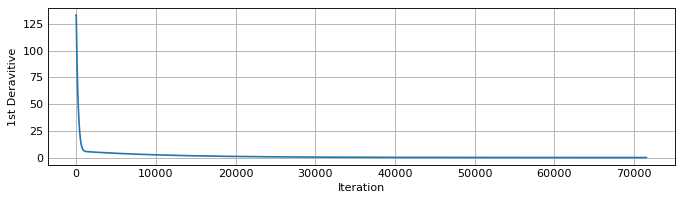

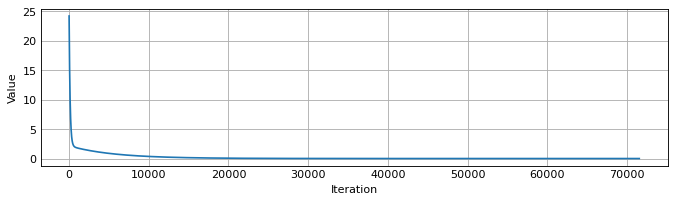

Soulution: 
[ 0.49703427 -0.19953646 -0.52881175]


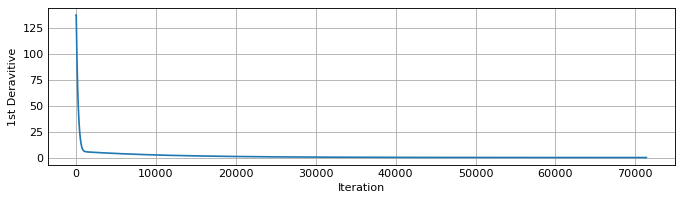

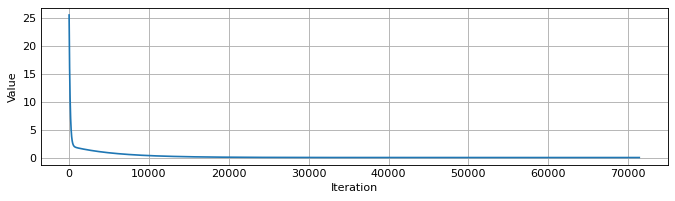

Soulution: 
[ 0.49703436 -0.19953647 -0.52881175]


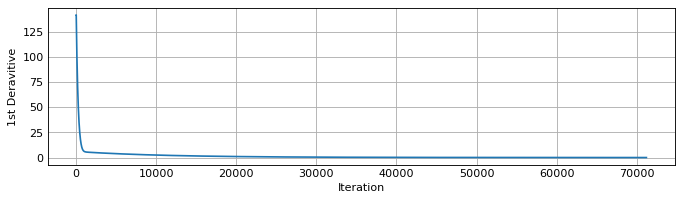

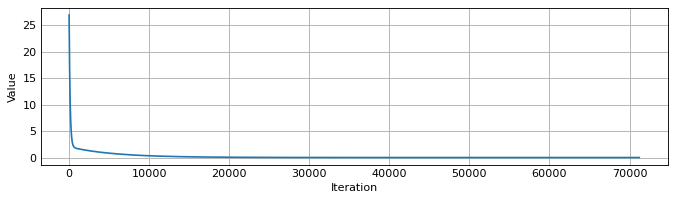

Soulution: 
[ 0.49703433 -0.19953647 -0.52881175]


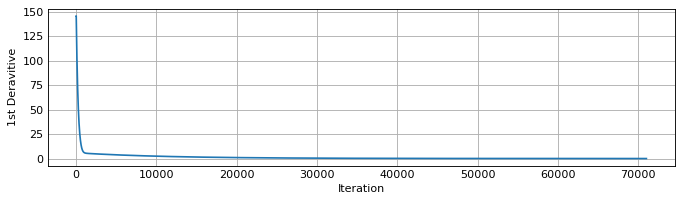

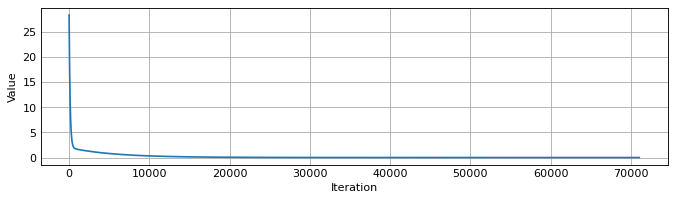

Soulution: 
[ 0.49703431 -0.19953647 -0.52881175]


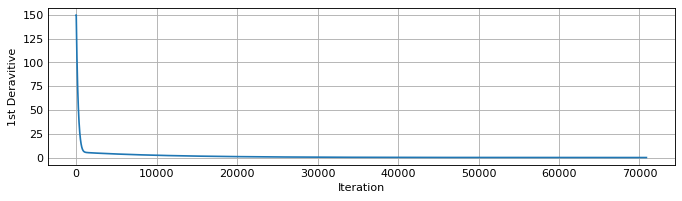

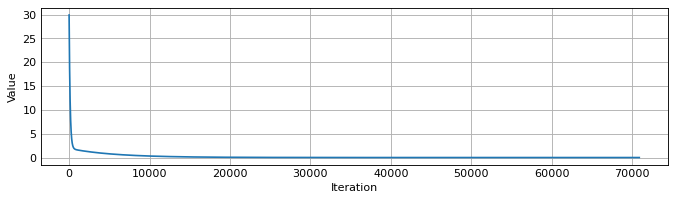

Soulution: 
[ 0.49703431 -0.19953647 -0.52881175]


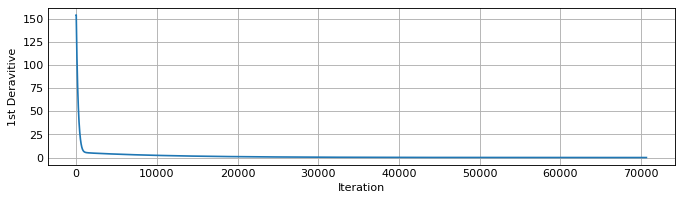

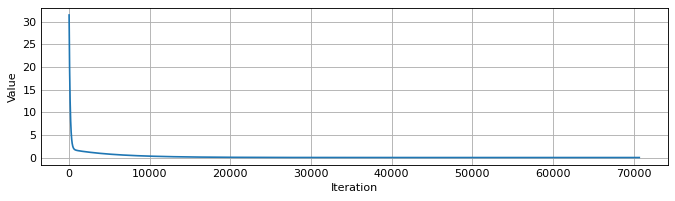

Soulution: 
[ 0.49703434 -0.19953647 -0.52881175]


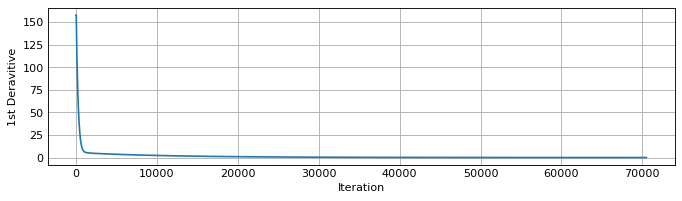

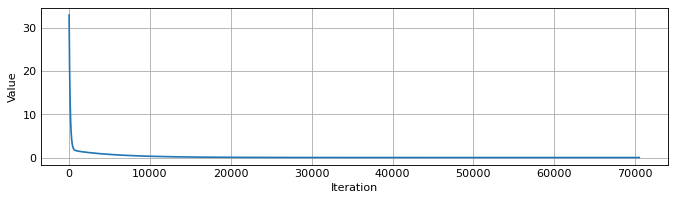

Soulution: 
[ 0.49703429 -0.19953646 -0.52881175]


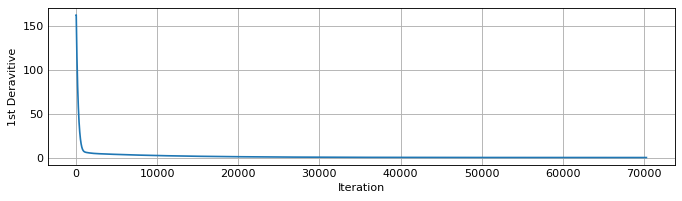

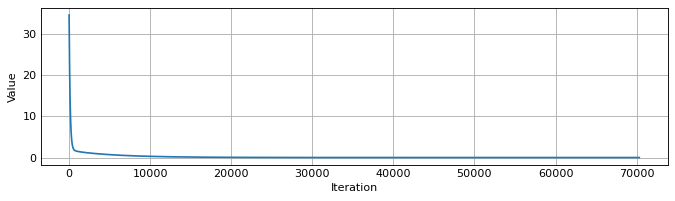

Soulution: 
[ 0.49703435 -0.19953647 -0.52881175]


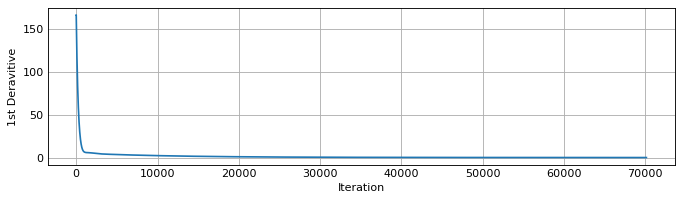

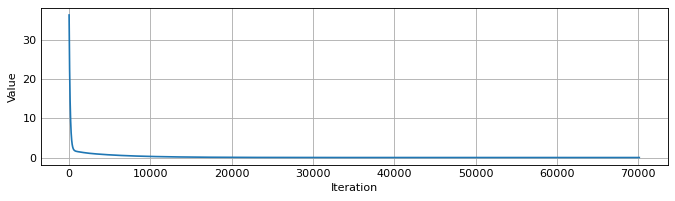

Soulution: 
[ 0.49703433 -0.19953647 -0.52881175]


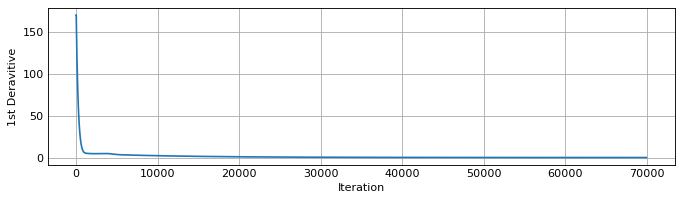

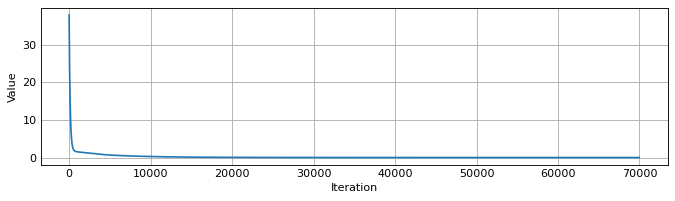

Soulution: 
[ 4.98886933e-01 -7.11954475e-05 -5.23600680e-01]


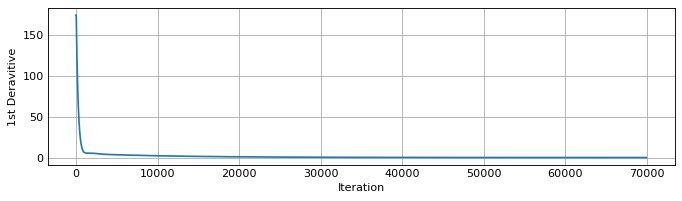

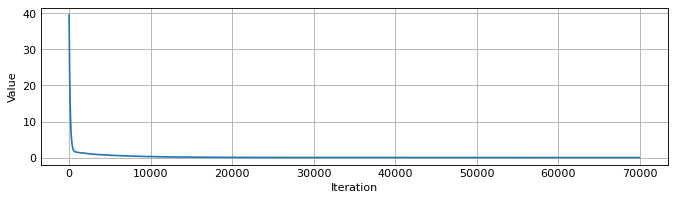

Soulution: 
[ 4.98886903e-01 -7.11973744e-05 -5.23600680e-01]


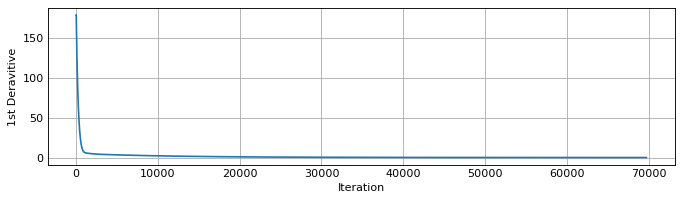

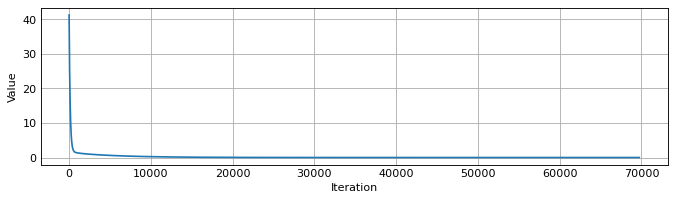

Soulution: 
[ 4.98886895e-01 -7.11978795e-05 -5.23600680e-01]


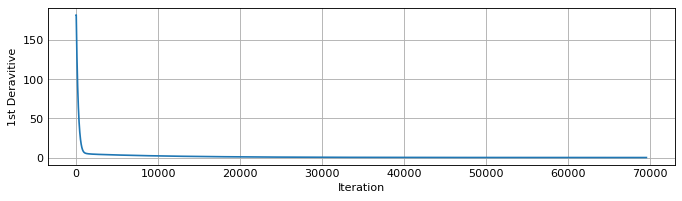

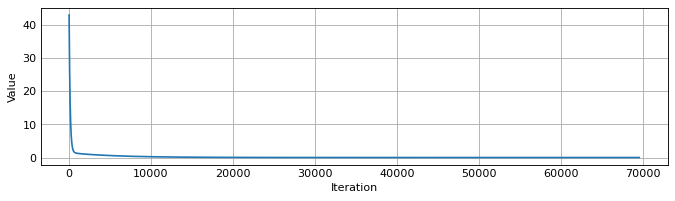

Soulution: 
[ 4.98886975e-01 -7.11928074e-05 -5.23600680e-01]


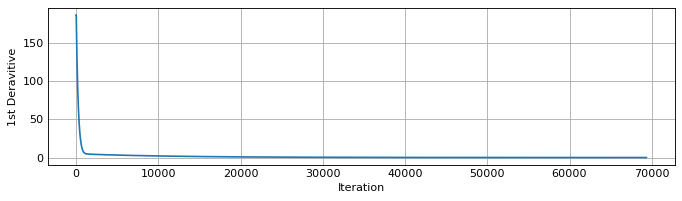

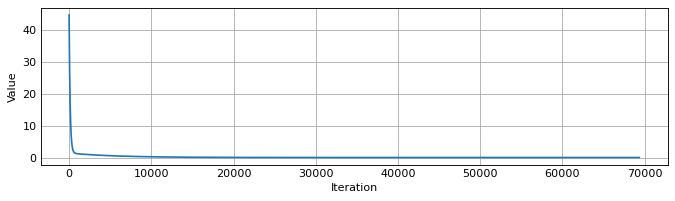

Soulution: 
[ 4.98886876e-01 -7.11991334e-05 -5.23600680e-01]


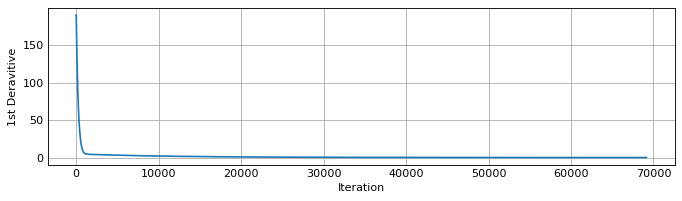

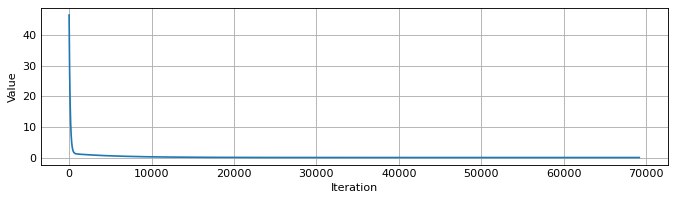

Soulution: 
[ 4.98886908e-01 -7.11970854e-05 -5.23600680e-01]


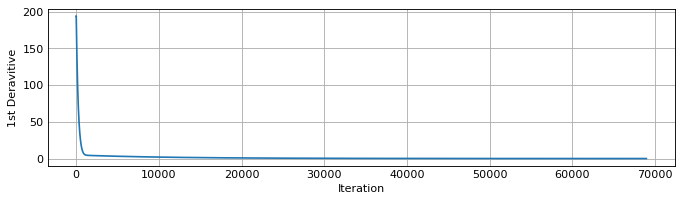

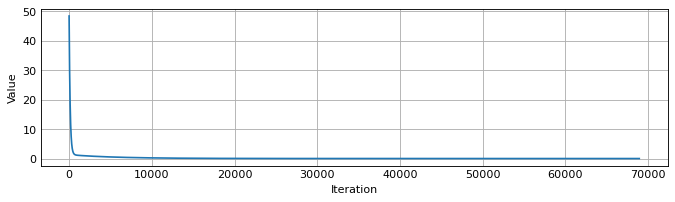

Soulution: 
[ 4.98886880e-01 -7.11988855e-05 -5.23600680e-01]


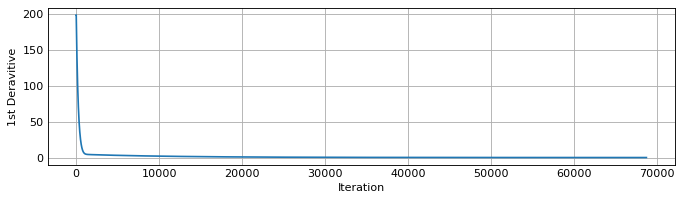

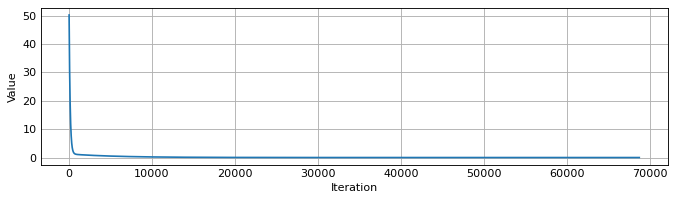

Soulution: 
[ 4.98886901e-01 -7.11975045e-05 -5.23600680e-01]


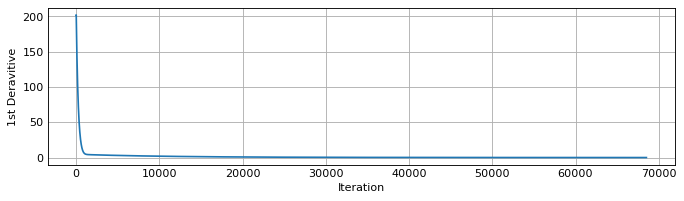

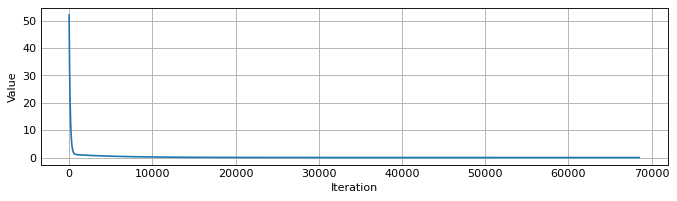

Soulution: 
[ 4.98886885e-01 -7.11985275e-05 -5.23600680e-01]


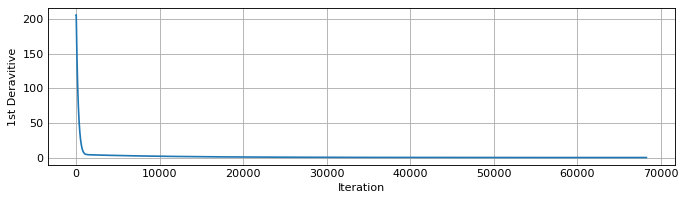

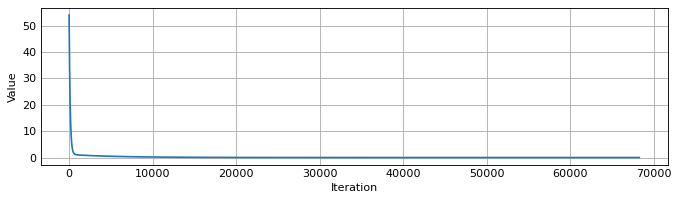

Soulution: 
[ 4.98886946e-01 -7.11946490e-05 -5.23600680e-01]


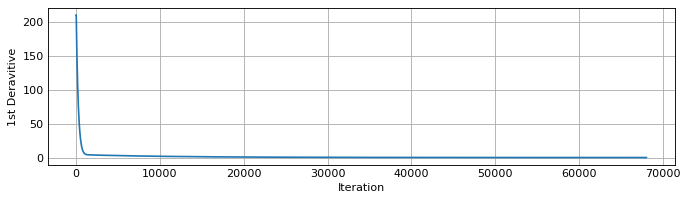

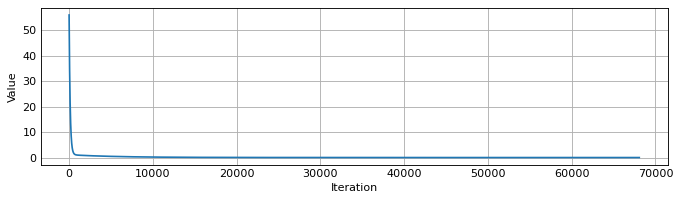

Soulution: 
[ 4.98886900e-01 -7.11975744e-05 -5.23600680e-01]


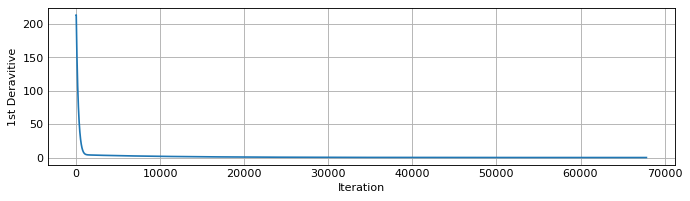

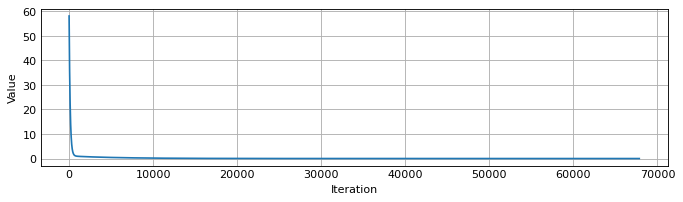

Soulution: 
[ 4.98886966e-01 -7.11933809e-05 -5.23600680e-01]


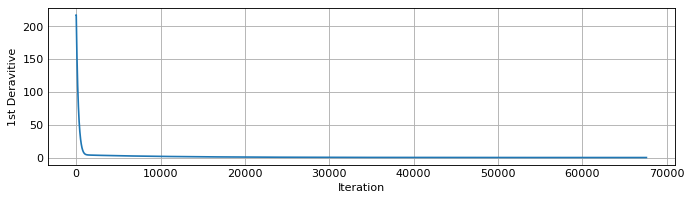

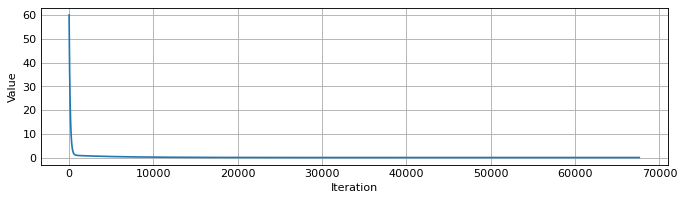

Soulution: 
[ 4.98886963e-01 -7.11935442e-05 -5.23600680e-01]


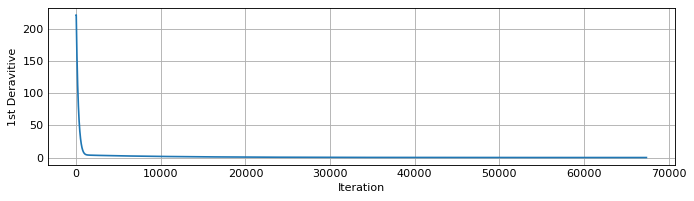

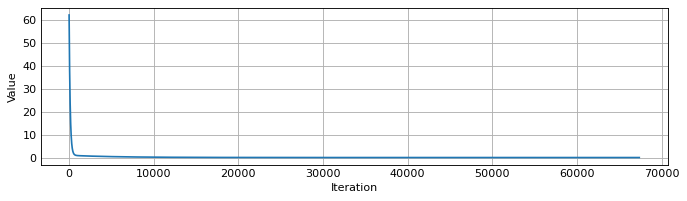

Soulution: 
[ 4.98886914e-01 -7.11966703e-05 -5.23600680e-01]


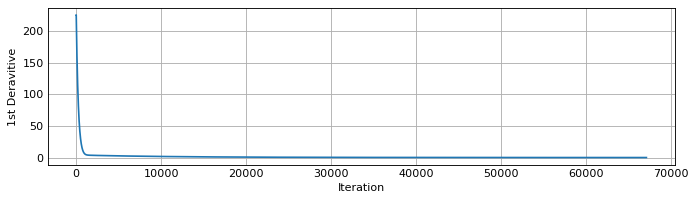

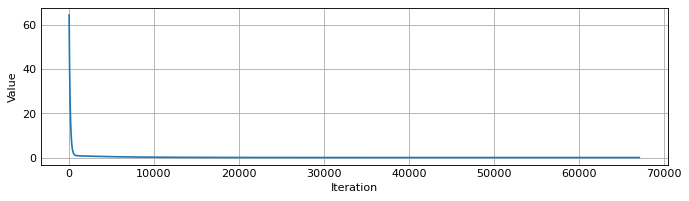

Soulution: 
[ 4.98886942e-01 -7.11948702e-05 -5.23600680e-01]


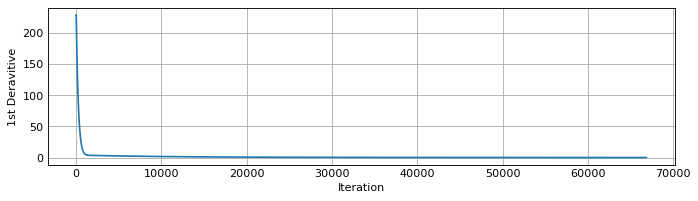

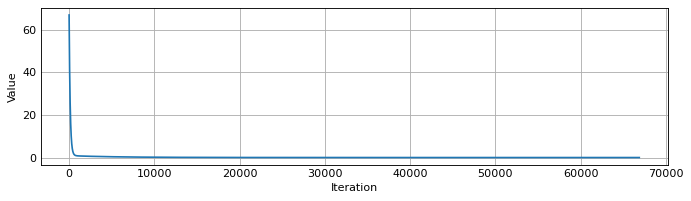

Soulution: 
[ 4.98886973e-01 -7.11928878e-05 -5.23600680e-01]


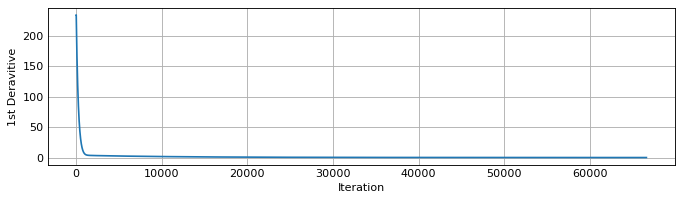

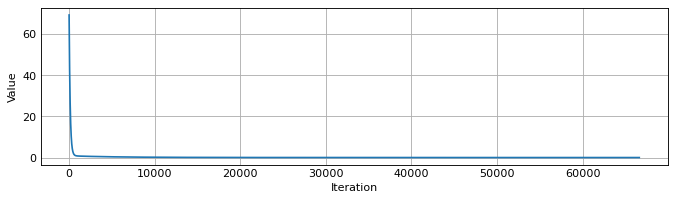

Soulution: 
[ 4.98886935e-01 -7.11953361e-05 -5.23600680e-01]


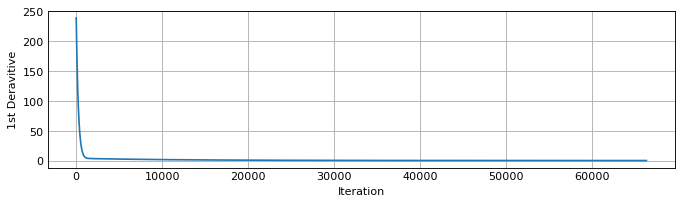

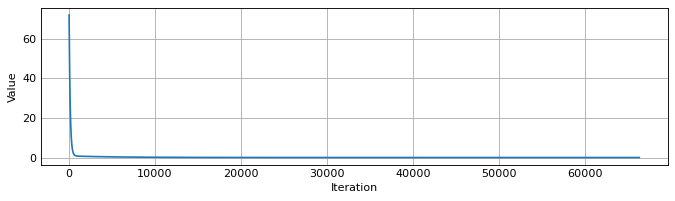

Soulution: 
[ 4.98886957e-01 -7.11939320e-05 -5.23600680e-01]


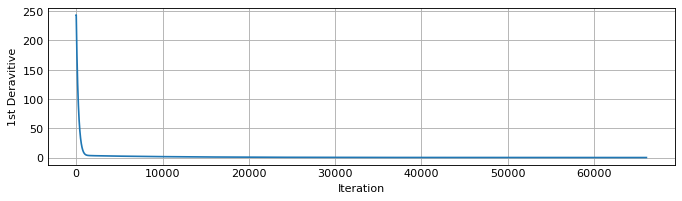

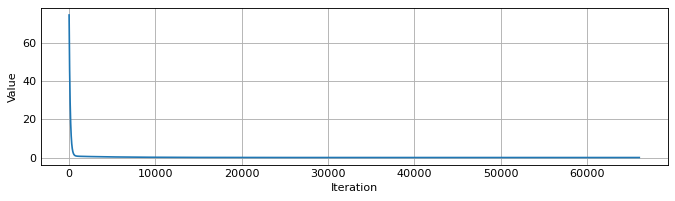

Soulution: 
[ 4.98886972e-01 -7.11929953e-05 -5.23600680e-01]


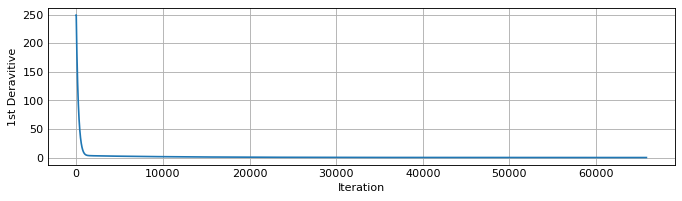

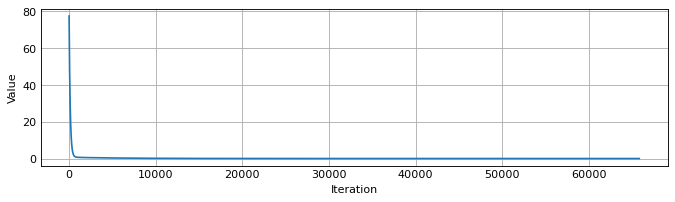

Soulution: 
[ 4.98886914e-01 -7.11966796e-05 -5.23600680e-01]


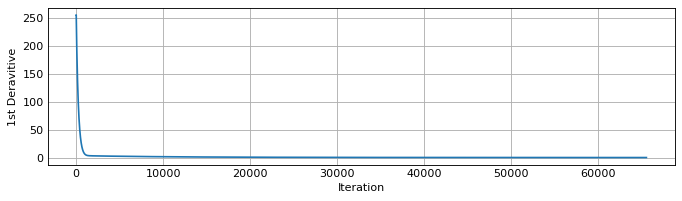

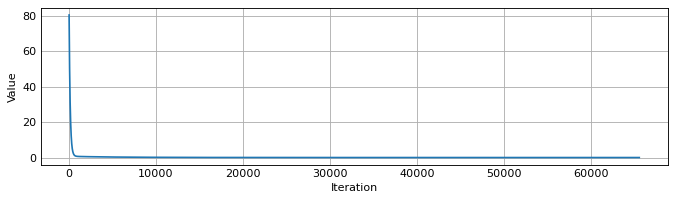

Soulution: 
[ 4.98886922e-01 -7.11961998e-05 -5.23600680e-01]


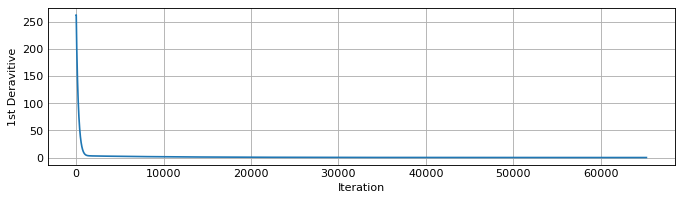

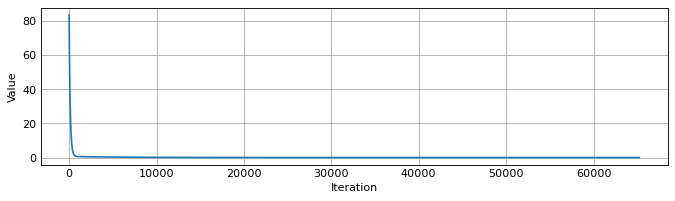

Soulution: 
[ 4.98886935e-01 -7.11953254e-05 -5.23600680e-01]


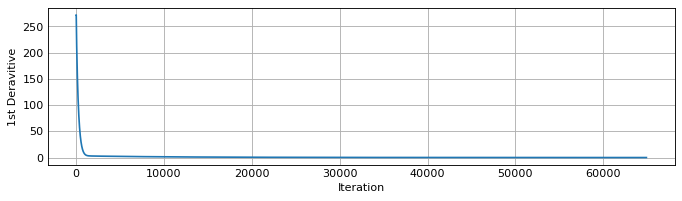

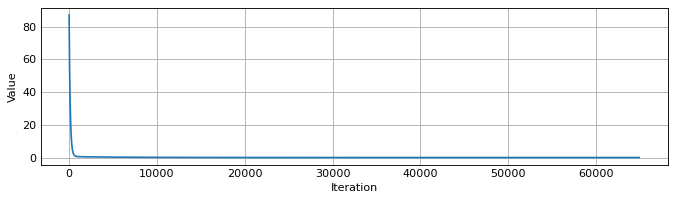

Soulution: 
[ 4.98886900e-01 -7.11976026e-05 -5.23600680e-01]


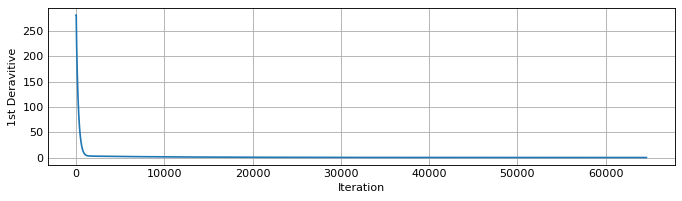

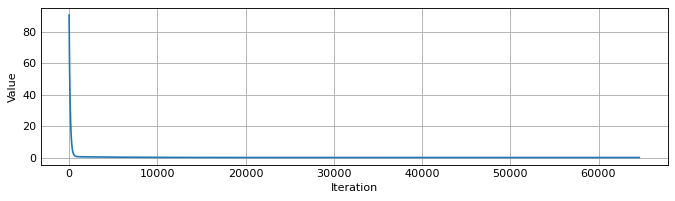

Soulution: 
[ 4.98886963e-01 -7.11935739e-05 -5.23600680e-01]


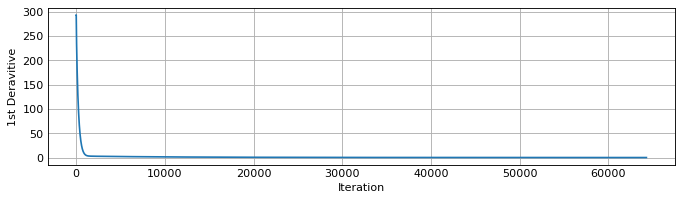

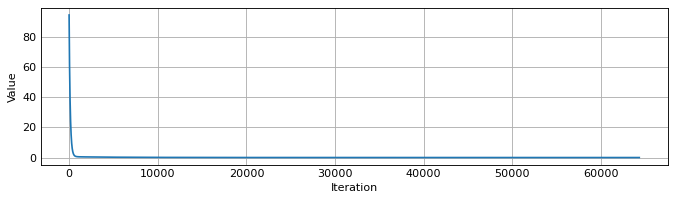

Soulution: 
[ 4.98886878e-01 -7.11990171e-05 -5.23600680e-01]


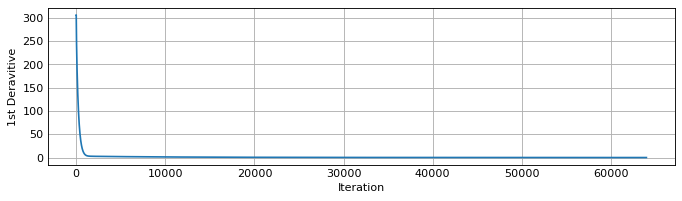

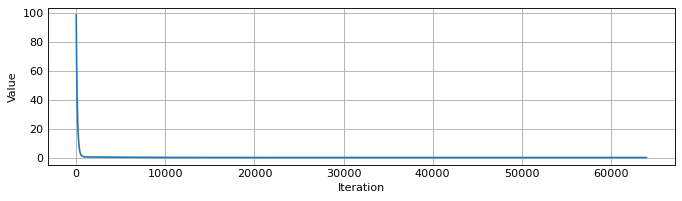

Soulution: 
[ 4.98886901e-01 -7.11975101e-05 -5.23600680e-01]


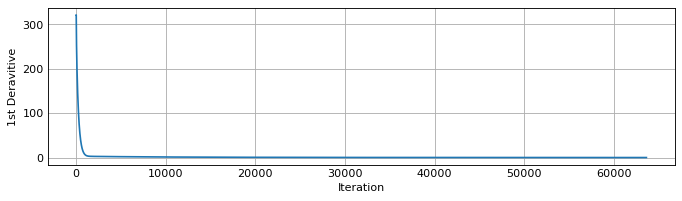

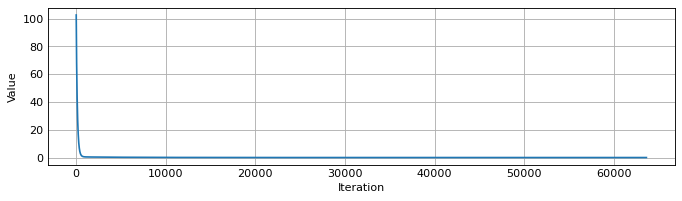

Soulution: 
[ 4.98886897e-01 -7.11977943e-05 -5.23600680e-01]


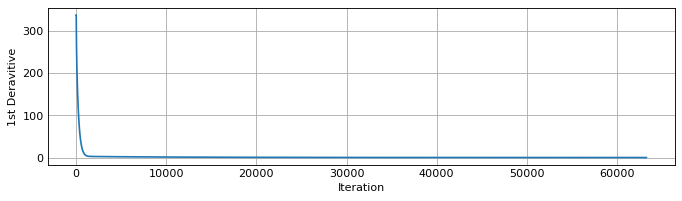

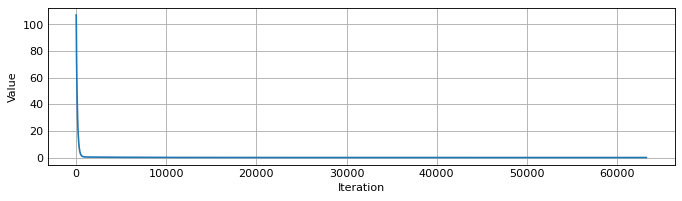

Soulution: 
[ 4.98886933e-01 -7.11954621e-05 -5.23600680e-01]


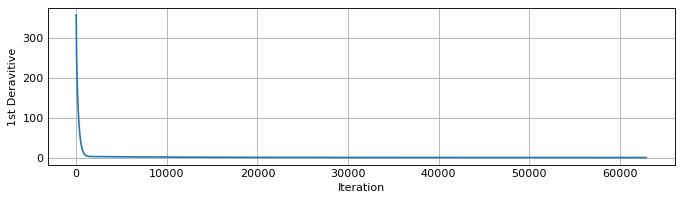

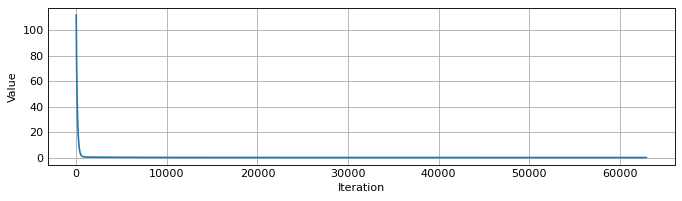

Soulution: 
[ 4.98886887e-01 -7.11984159e-05 -5.23600680e-01]


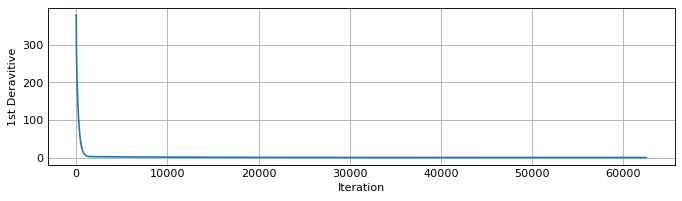

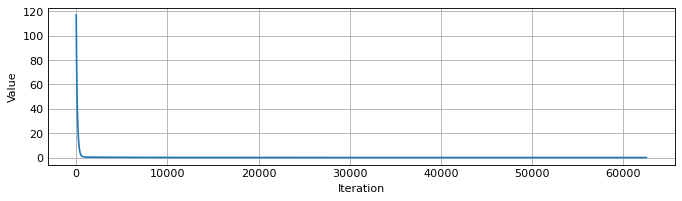

Soulution: 
[ 4.98886942e-01 -7.11949169e-05 -5.23600680e-01]


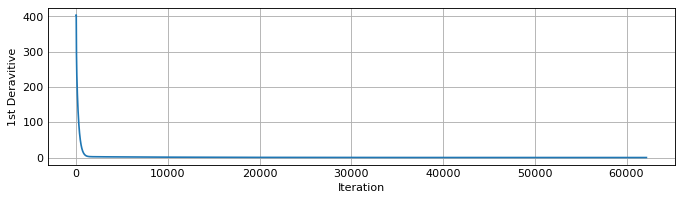

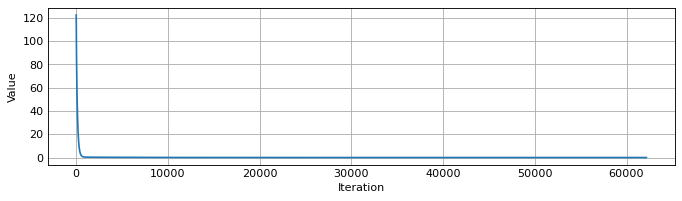

Soulution: 
[ 4.98886891e-01 -7.11981583e-05 -5.23600680e-01]


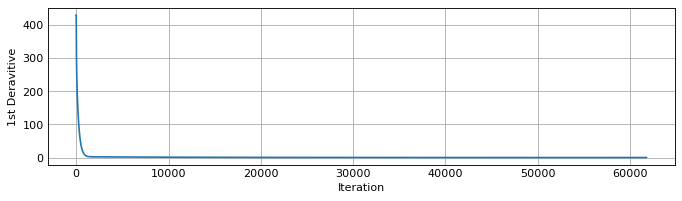

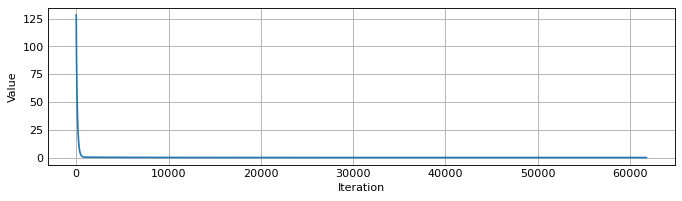

Soulution: 
[ 4.98886938e-01 -7.11951551e-05 -5.23600680e-01]


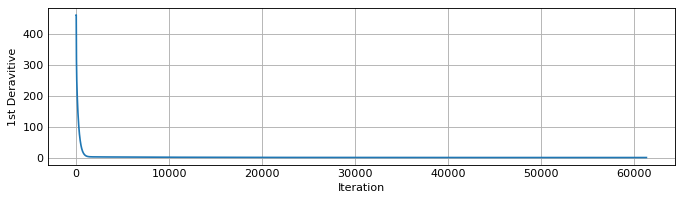

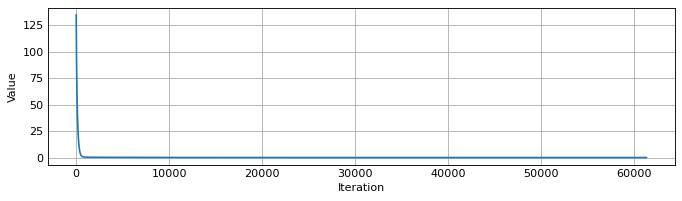

Soulution: 
[ 4.98886899e-01 -7.11976645e-05 -5.23600680e-01]


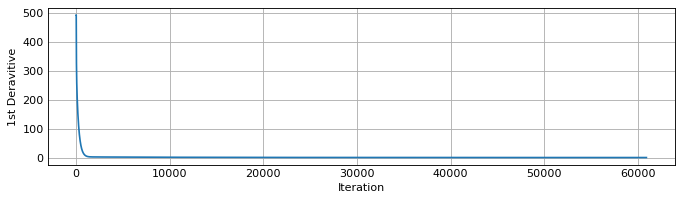

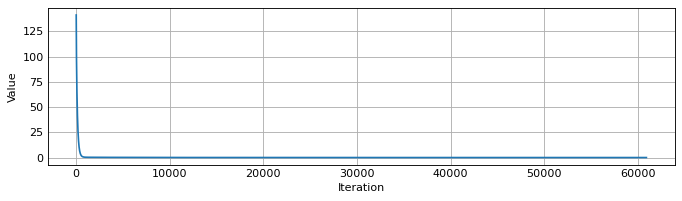

Soulution: 
[ 4.98886903e-01 -7.11974168e-05 -5.23600680e-01]


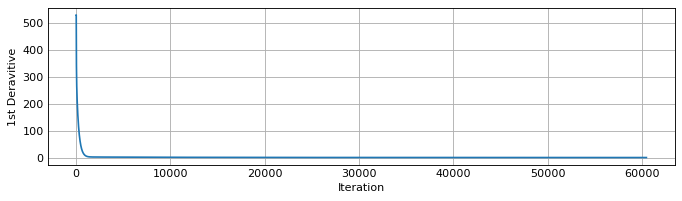

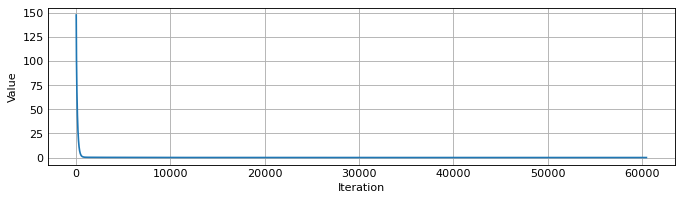

Soulution: 
[ 4.98886896e-01 -7.11978551e-05 -5.23600680e-01]


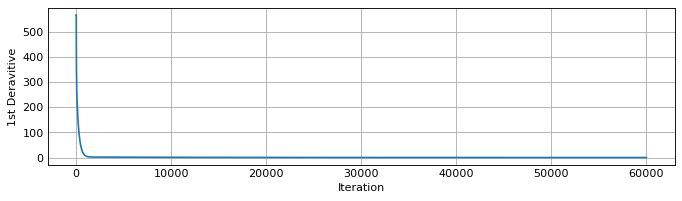

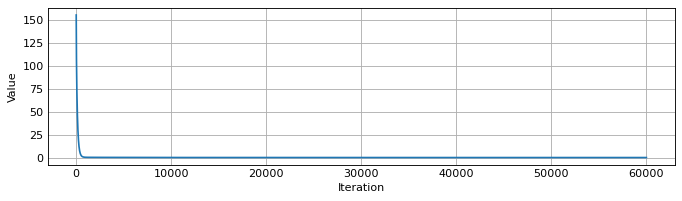

Soulution: 
[ 4.98886943e-01 -7.11948182e-05 -5.23600680e-01]


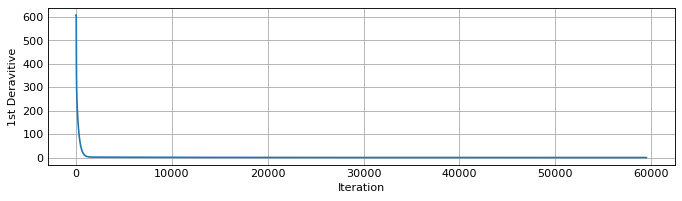

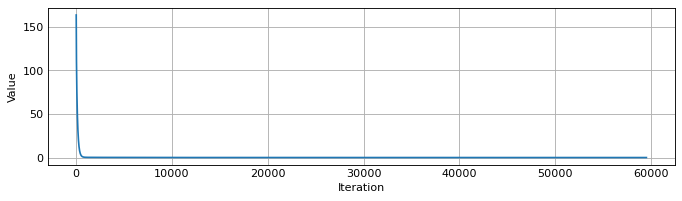

Soulution: 
[ 4.98886933e-01 -7.11954506e-05 -5.23600680e-01]


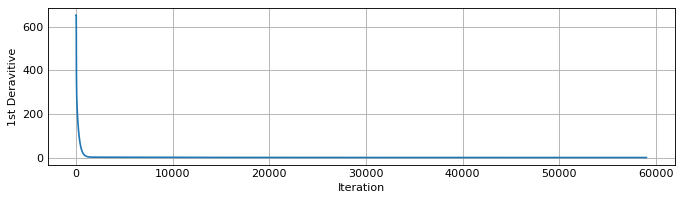

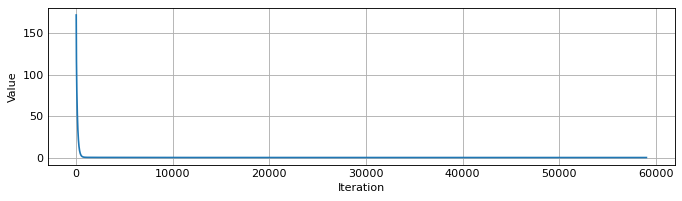

Soulution: 
[ 4.98886881e-01 -7.11987893e-05 -5.23600680e-01]


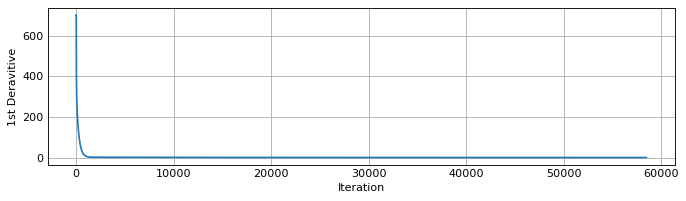

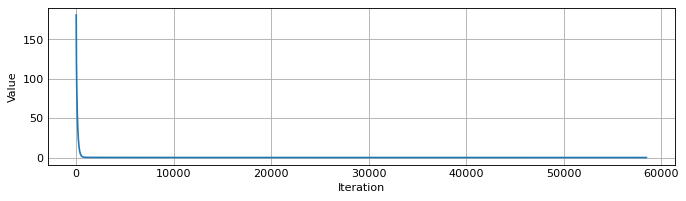

Soulution: 
[ 4.98886934e-01 -7.11954147e-05 -5.23600680e-01]


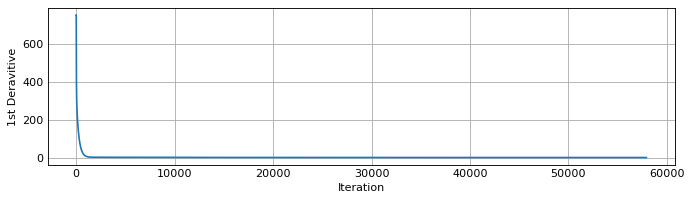

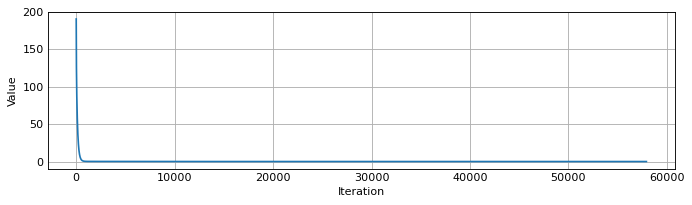

Soulution: 
[ 4.98886879e-01 -7.11988988e-05 -5.23600680e-01]


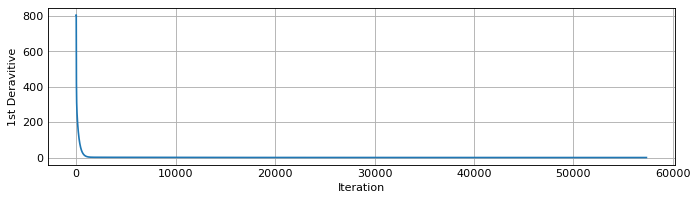

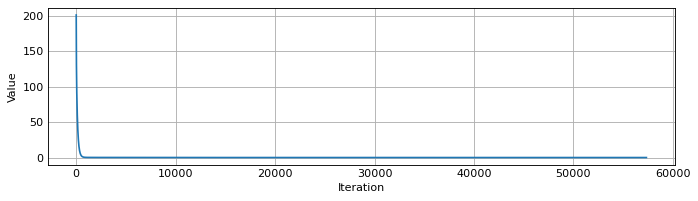

Soulution: 
[ 4.98886953e-01 -7.11942151e-05 -5.23600680e-01]


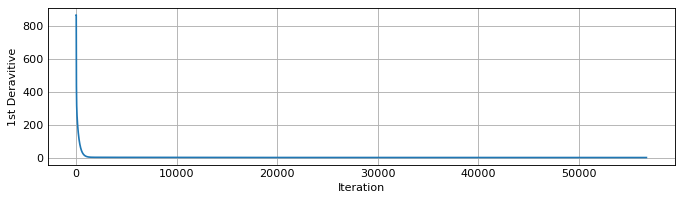

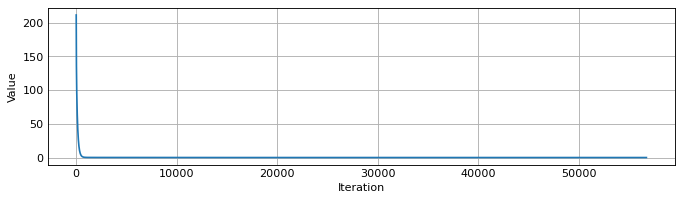

Soulution: 
[ 4.9888695e-01 -7.1194406e-05 -5.2360068e-01]


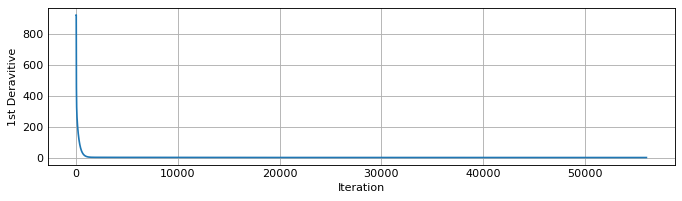

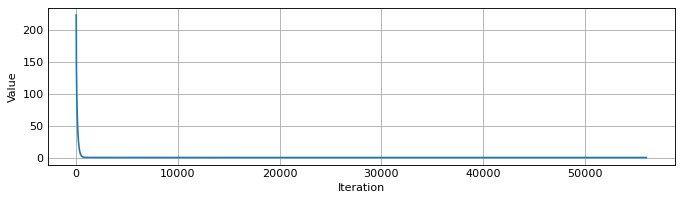

Soulution: 
[ 4.98886941e-01 -7.11949700e-05 -5.23600680e-01]


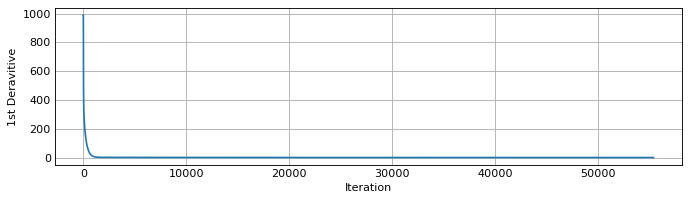

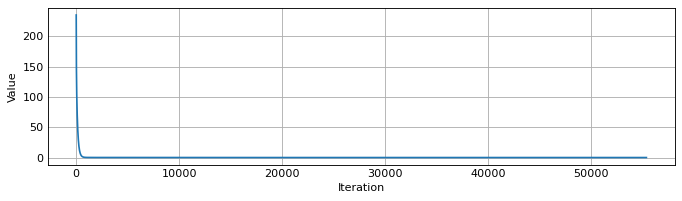

Soulution: 
[ 4.98886892e-01 -7.11980795e-05 -5.23600680e-01]


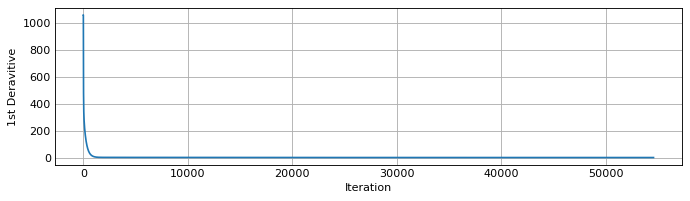

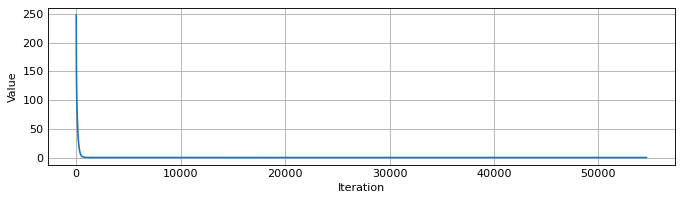

Soulution: 
[ 4.98886892e-01 -7.11980629e-05 -5.23600680e-01]


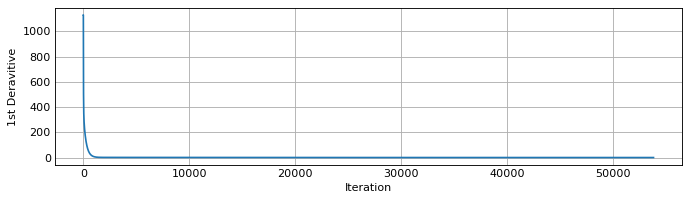

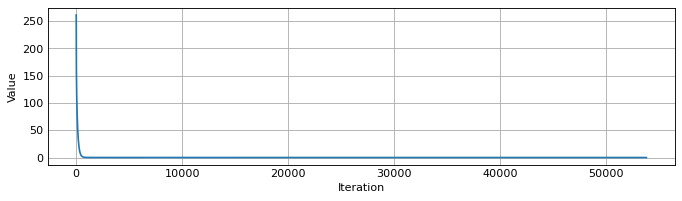

Soulution: 
[ 4.98886892e-01 -7.11980868e-05 -5.23600680e-01]


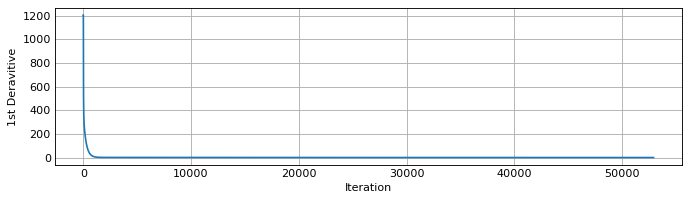

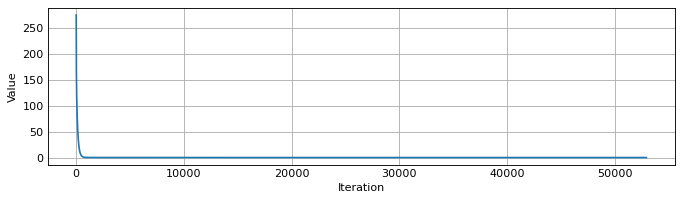

Soulution: 
[ 4.98886957e-01 -7.11939094e-05 -5.23600680e-01]


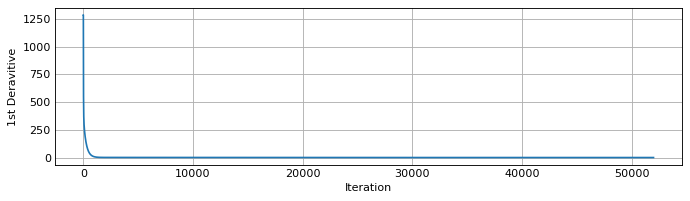

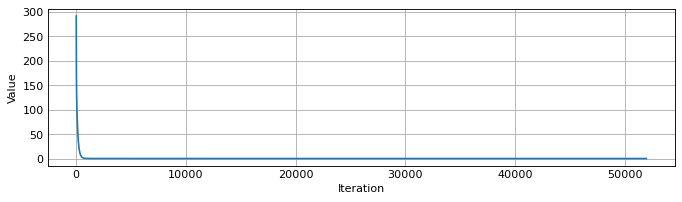

Soulution: 
[ 4.98886952e-01 -7.11942844e-05 -5.23600680e-01]


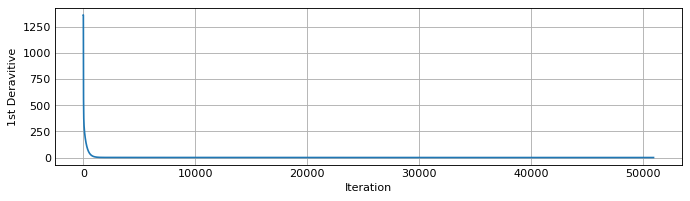

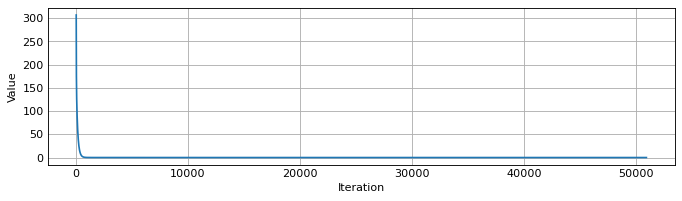

Soulution: 
[ 4.98886954e-01 -7.11941089e-05 -5.23600680e-01]


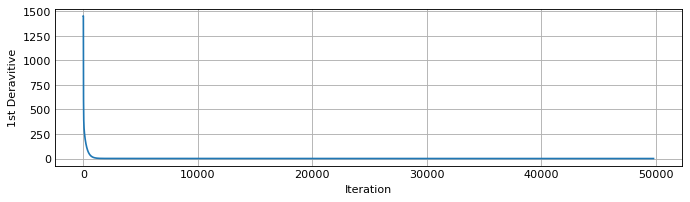

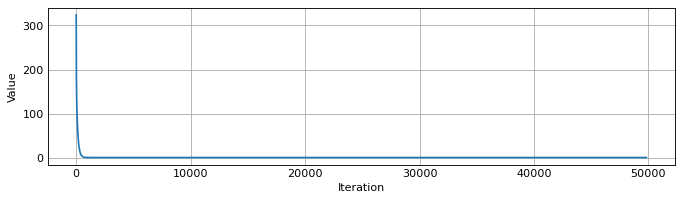

Soulution: 
[ 4.98886953e-01 -7.11942014e-05 -5.23600680e-01]


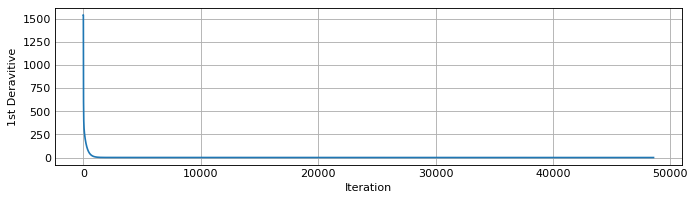

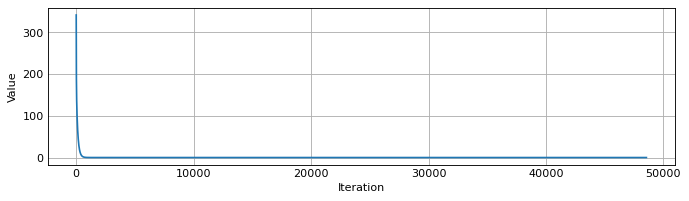

Soulution: 
[ 4.98886954e-01 -7.11941610e-05 -5.23600680e-01]


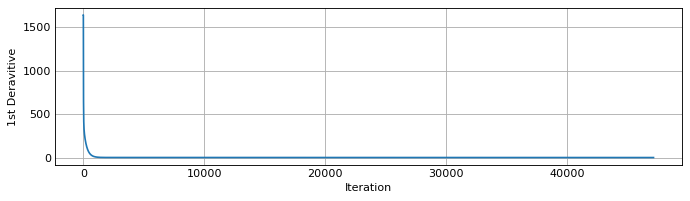

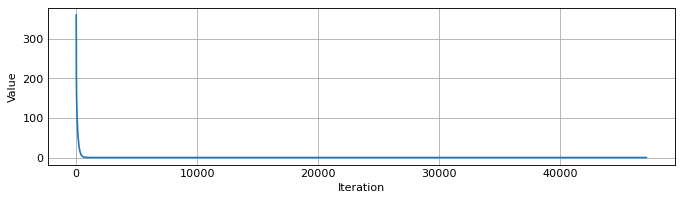

Soulution: 
[ 4.98886924e-01 -7.11960485e-05 -5.23600680e-01]


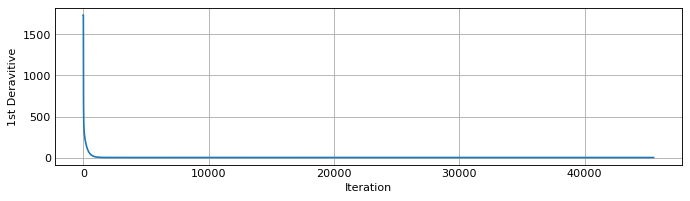

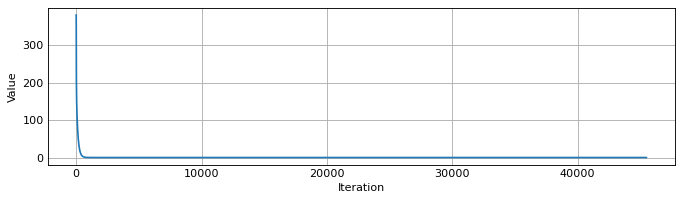

Soulution: 
[ 4.98886906e-01 -7.11972080e-05 -5.23600680e-01]


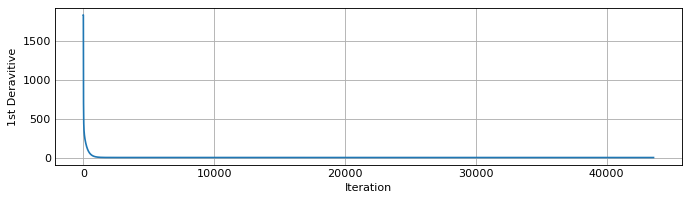

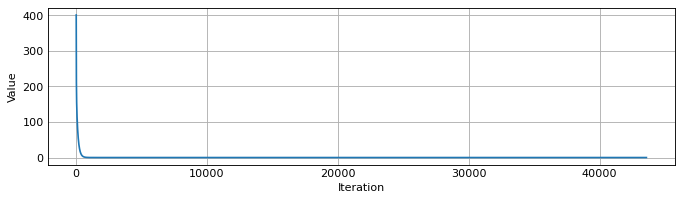

Soulution: 
[ 4.98886892e-01 -7.11981120e-05 -5.23600680e-01]


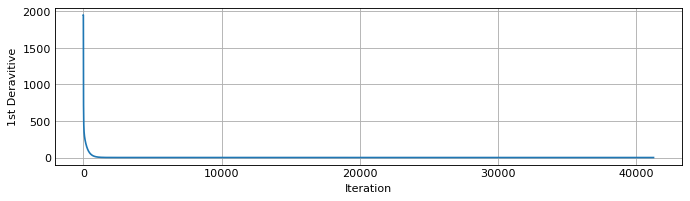

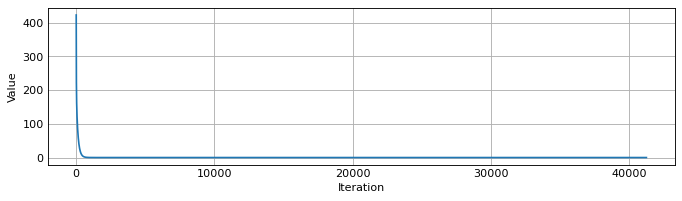

Soulution: 
[ 4.98886876e-01 -7.11990858e-05 -5.23600680e-01]


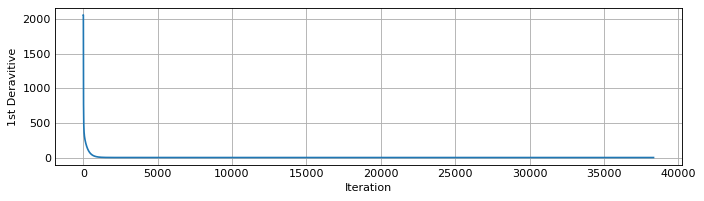

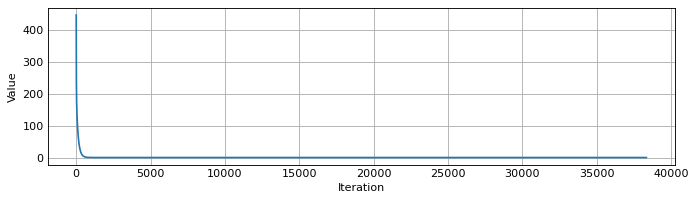

Soulution: 
[ 4.98886914e-01 -7.11966782e-05 -5.23600680e-01]


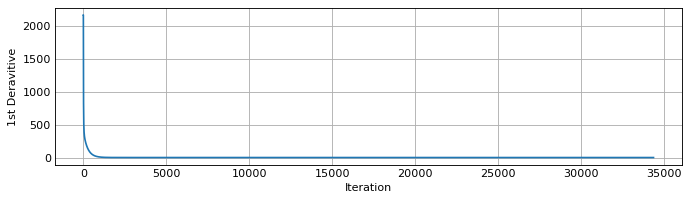

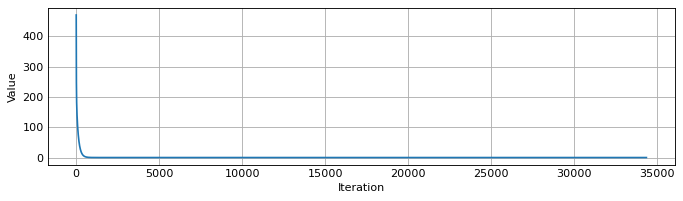

Soulution: 
[ 4.98886970e-01 -7.11931296e-05 -5.23600680e-01]


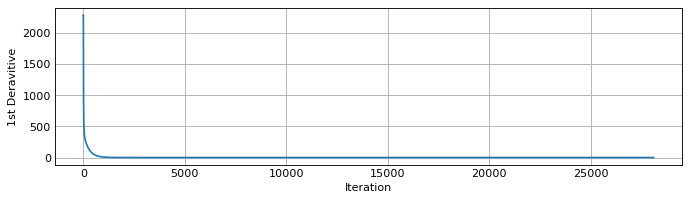

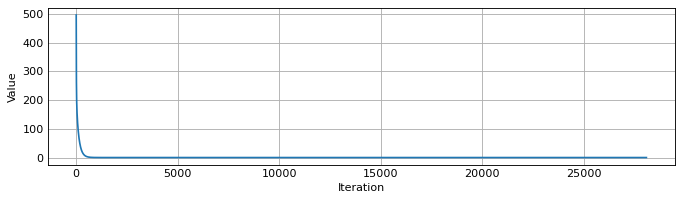

Soulution: 
[ 4.98886974e-01 -7.11928633e-05 -5.23600680e-01]


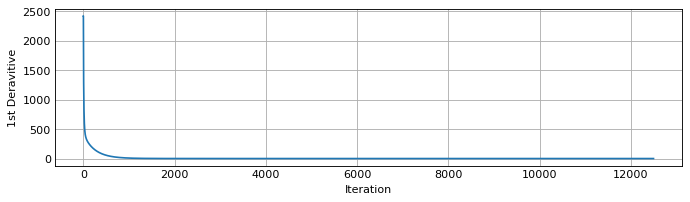

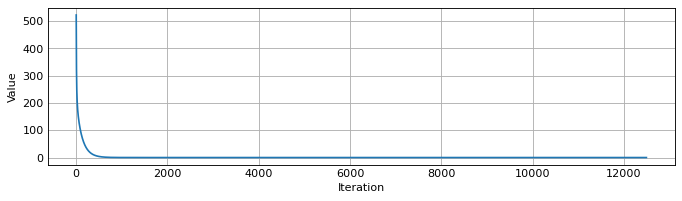

Soulution: 
[ 5.01113043e-01  7.12999807e-05 -5.23596861e-01]


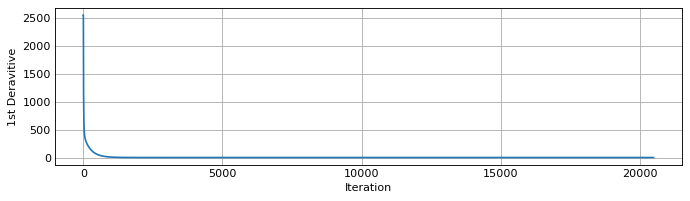

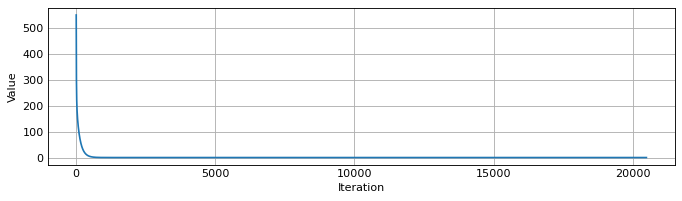

In [7]:
sol =np.array([optimize([1,1,1],0.00005,0.000001)])
for i in np.arange(-0.5,0.5,0.01):
    sol=np.append(sol,[optimize((i,i,i),0.0001,0.01)], axis=0)

Soulution is (0.5,-0.2,-0.5)

In [ ]:
print(sol)